In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
#read in the general csv too
df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/antagonists_low_ddg_refined_placements_data.csv")

In [5]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

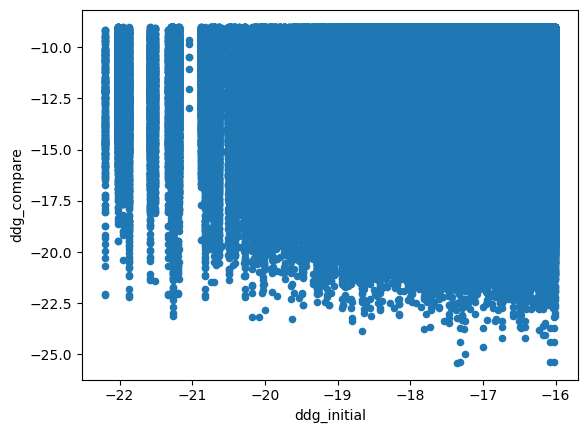

In [6]:
df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

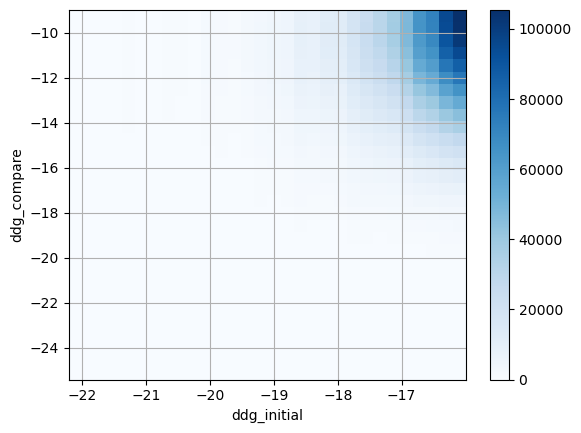

In [7]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

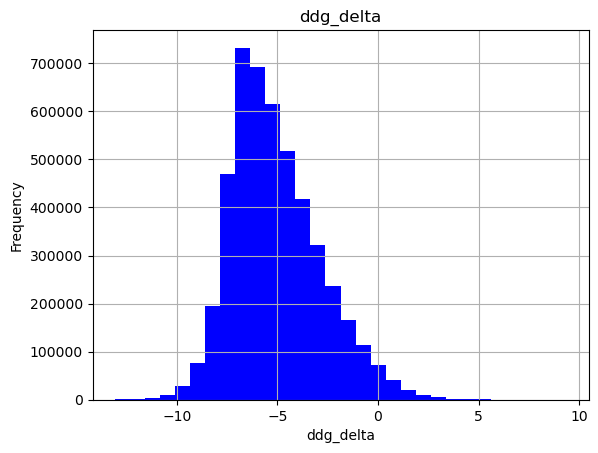

In [8]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

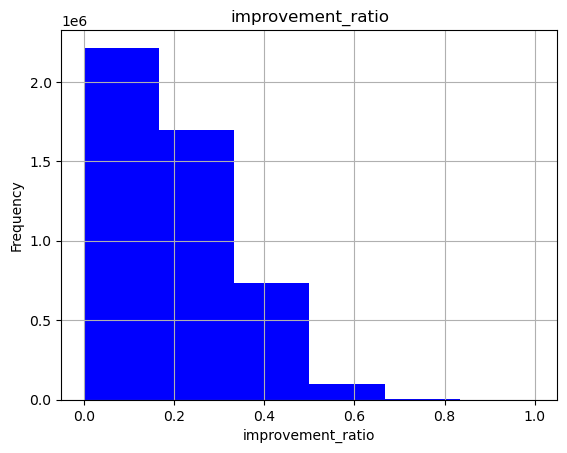

In [9]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [10]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 3) & (df_general['rmsd'] <= 6) & (df_general['real_motif_ratio_compare'] >= 0.5) & (df_general['ddg_delta'] > -100) & (df_general['ddg_compare'] <= -7)]

In [11]:
df_general_filtered

file_initial  \
54161      /scratch/abgvg9/discovery_results/antagonists/8405/placements/4s0v_receptor_only_PV-000420039662_9_3.pdb   
54766     /scratch/abgvg9/discovery_results/antagonists/8405/placements/4s0v_receptor_only_PV-000420039662_9_10.pdb   
55371      /scratch/abgvg9/discovery_results/antagonists/8405/placements/4s0v_receptor_only_PV-000420039662_9_6.pdb   
180376    /scratch/abgvg9/discovery_results/antagonists/1535/placements/4s0v_receptor_only_PV-000603097812_10_4.pdb   
198968   /scratch/abgvg9/discovery_results/antagonists/9198/placements/4s0v_receptor_only_PV-001118074881_14_10.pdb   
...                                                                                                             ...   
4524429        /scratch/abgvg9/discovery_results/antagonists/6668/placements/4s0v_receptor_only_Z4026346247_6_1.pdb   
4631486         /scratch/abgvg9/discovery_results/antagonists/263/placements/4s0v_receptor_only_Z4505749535_7_8.pdb   
4646600      /scratch/abgvg9/discovery_results/antagonists/11443/placements/4s0v_receptor_only_Z4598253378_8_31.pdb   
4649168      /scratch/abgvg9/discovery_results/antagonists/11443/placements/4s0v_receptor_only_Z4598253378_8_51.pdb   
4732634        /scratch/abgvg9/discovery_results/antagonists/11385/placements/4s0v_receptor_only_Z854493106_5_9.pdb   

                                                                                                                                                                                      file_compare  \
54161     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000420039662/placements/4s0v_receptor_only_PV-000420039662_65_6.pdb   
54766     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000420039662/placements/4s0v_receptor_only_PV-000420039662_65_6.pdb   
55371     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000420039662/placements/4s0v_receptor_only_PV-000420039662_65_6.pdb   
180376   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000603097812/placements/4s0v_receptor_only_PV-000603097812_154_3.pdb   
198968    /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-001118074881/placements/4s0v_receptor_only_PV-001118074881_16_0.pdb   
...                                                                                                                                                                                            ...   
4524429            /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z4026346247/placements/4s0v_receptor_only_Z4026346247_2_4.pdb   
4631486          /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z4505749535/placements/4s0v_receptor_only_Z4505749535_207_2.pdb   
4646600          /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z4598253378/placements/4s0v_receptor_only_Z4598253378_236_6.pdb   
4649168          /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z4598253378/placements/4s0v_receptor_only_Z4598253378_236_6.pdb   
4732634             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z854493106/placements/4s0v_receptor_only_Z854493106_2_11.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
54161     -17.477201   -14.664712  -2.812489                   7.0   
54766     -16.023275   -14.664712  -1.358563                   7.0   
55371     -16.577406   -14.664712  -1.912694                   6.0   
180376    -16.309

In [12]:
len(df_general_filtered)

106

In [13]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [14]:
df_general_filtered_lite

file_initial  \
1651     /scratch/abgvg9/discovery_results/antagonists/11951/placements/4s0v_receptor_only_PV-000238653614_11_1.pdb   
2219      /scratch/abgvg9/discovery_results/antagonists/11613/placements/4s0v_receptor_only_PV-000238653619_3_3.pdb   
7404      /scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_8.pdb   
7490      /scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_8.pdb   
7664     /scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_10.pdb   
...                                                                                                             ...   
4751342        /scratch/abgvg9/discovery_results/antagonists/11423/placements/4s0v_receptor_only_Z983689930_3_0.pdb   
4751349        /scratch/abgvg9/discovery_results/antagonists/11423/placements/4s0v_receptor_only_Z983689930_3_0.pdb   
4751435        /scratch/abgvg9/discovery_results/antagonists/11423/placements/4s0v_receptor_only_Z983689930_3_0.pdb   
4751614        /scratch/abgvg9/discovery_results/antagonists/11423/placements/4s0v_receptor_only_Z983689930_3_0.pdb   
4752047         /scratch/abgvg9/discovery_results/antagonists/11392/placements/4s0v_receptor_only_Z99188459_6_0.pdb   

                                                                                                                                                                                      file_compare  \
1651     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000238653614/placements/4s0v_receptor_only_PV-000238653614_186_2.pdb   
2219     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000238653619/placements/4s0v_receptor_only_PV-000238653619_162_2.pdb   
7404     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_116_2.pdb   
7490     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_116_5.pdb   
7664     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_116_2.pdb   
...                                                                                                                                                                                            ...   
4751342             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z983689930/placements/4s0v_receptor_only_Z983689930_79_5.pdb   
4751349             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z983689930/placements/4s0v_receptor_only_Z983689930_81_6.pdb   
4751435             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z983689930/placements/4s0v_receptor_only_Z983689930_79_2.pdb   
4751614            /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z983689930/placements/4s0v_receptor_only_Z983689930_174_1.pdb   
4752047               /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z99188459/placements/4s0v_receptor_only_Z99188459_80_1.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
1651      -17.121603   -10.436863  -6.684740                  12.0   
2219      -17.783325   -11.551974  -6.231351                  11.0   
7404      -17.193058   -10.349262  -6.843796                   8.0   
7490      -17.193

In [15]:
len(df_general_filtered_lite)

6858

In [16]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [17]:
len(df_recoveries)

50932

In [18]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [19]:
len(closest_recovery_general_df)

7205

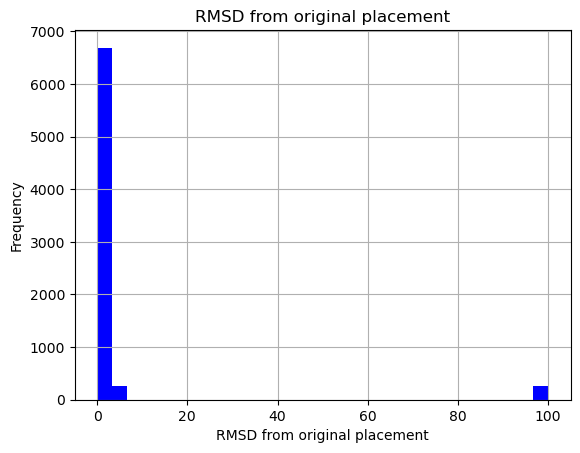

In [21]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('RMSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [22]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

6879

In [23]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.9547536433032616

In [24]:
systems_with_a_close_recovery_df

file_initial  \
4414030          /scratch/abgvg9/discovery_results/antagonists/100/placements/4s0v_receptor_only_Z3472421949_4_0.pdb   
4415616          /scratch/abgvg9/discovery_results/antagonists/100/placements/4s0v_receptor_only_Z3472421949_4_1.pdb   
2253402   /scratch/abgvg9/discovery_results/antagonists/10005/placements/4s0v_receptor_only_PV-005597986868_15_0.pdb   
2252360  /scratch/abgvg9/discovery_results/antagonists/10005/placements/4s0v_receptor_only_PV-005597986868_15_11.pdb   
2252751   /scratch/abgvg9/discovery_results/antagonists/10005/placements/4s0v_receptor_only_PV-005597986868_15_7.pdb   
...                                                                                                              ...   
1943538     /scratch/abgvg9/discovery_results/antagonists/9384/placements/4s0v_receptor_only_PV-005081139196_2_8.pdb   
1944038    /scratch/abgvg9/discovery_results/antagonists/9384/placements/4s0v_receptor_only_PV-005081524174_13_0.pdb   
1946449     /scratch/abgvg9/discovery_results/antagonists/9389/placements/4s0v_receptor_only_PV-005085376509_3_1.pdb   
1946763    /scratch/abgvg9/discovery_results/antagonists/9389/placements/4s0v_receptor_only_PV-005085383112_15_3.pdb   
1947177   /scratch/abgvg9/discovery_results/antagonists/9389/placements/4s0v_receptor_only_PV-005085448662_10_13.pdb   

                                                                                                                                                                                      file_compare  \
4414030            /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z3472421949/placements/4s0v_receptor_only_Z3472421949_1_0.pdb   
4415616            /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z3472421949/placements/4s0v_receptor_only_Z3472421949_1_0.pdb   
2253402  /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005597986868/placements/4s0v_receptor_only_PV-005597986868_20_11.pdb   
2252360   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005597986868/placements/4s0v_receptor_only_PV-005597986868_20_0.pdb   
2252751   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005597986868/placements/4s0v_receptor_only_PV-005597986868_20_0.pdb   
...                                                                                                                                                                                            ...   
1943538    /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005081139196/placements/4s0v_receptor_only_PV-005081139196_4_6.pdb   
1944038  /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005081524174/placements/4s0v_receptor_only_PV-005081524174_123_3.pdb   
1946449   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005085376509/placements/4s0v_receptor_only_PV-005085376509_29_6.pdb   
1946763   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005085383112/placements/4s0v_receptor_only_PV-005085383112_51_3.pdb   
1947177   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005085448662/placements/4s0v_receptor_only_PV-005085448662_3_13.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
4414030   -17.132893   -16.862061  -0.270832                   8.0   
4415616   -18.526749   -16.862061  -1.664688                   8.0   
2253402   -16.219546   -16.042707  -0.176839                   6.0   
225236

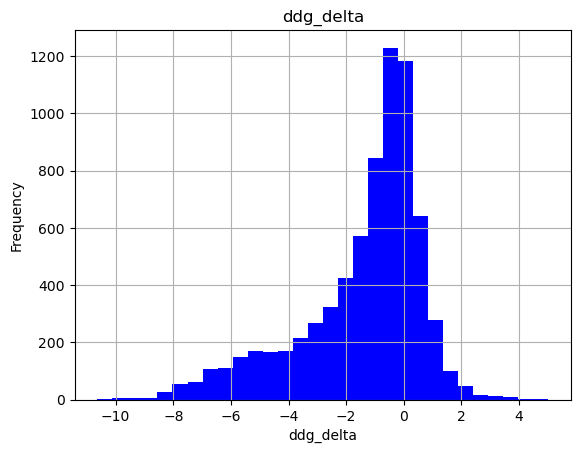

In [25]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [26]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

326

In [27]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.04524635669673838

In [28]:
systems_without_a_close_recovery_df

file_initial  \
2248825  /scratch/abgvg9/discovery_results/antagonists/10002/placements/4s0v_receptor_only_PV-005595072039_12_0.pdb   
2267535   /scratch/abgvg9/discovery_results/antagonists/10025/placements/4s0v_receptor_only_PV-005614687577_7_1.pdb   
2286152  /scratch/abgvg9/discovery_results/antagonists/10056/placements/4s0v_receptor_only_PV-005639686982_11_0.pdb   
2286161  /scratch/abgvg9/discovery_results/antagonists/10056/placements/4s0v_receptor_only_PV-005639686983_11_2.pdb   
2306142   /scratch/abgvg9/discovery_results/antagonists/10085/placements/4s0v_receptor_only_PV-005663969167_9_3.pdb   
...                                                                                                             ...   
233058    /scratch/abgvg9/discovery_results/antagonists/9239/placements/4s0v_receptor_only_PV-001410443349_11_6.pdb   
1843669    /scratch/abgvg9/discovery_results/antagonists/9260/placements/4s0v_receptor_only_PV-004977296091_3_4.pdb   
1854039   /scratch/abgvg9/discovery_results/antagonists/9274/placements/4s0v_receptor_only_PV-004989182225_12_0.pdb   
1906422    /scratch/abgvg9/discovery_results/antagonists/9336/placements/4s0v_receptor_only_PV-005040698651_4_0.pdb   
1925491   /scratch/abgvg9/discovery_results/antagonists/9358/placements/4s0v_receptor_only_PV-005059620526_5_20.pdb   

                                                                                                                                                                                      file_compare  \
2248825    /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005595072039/placements/4s0v_receptor_only_PV-005595072039_4_2.pdb   
2267535  /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005614687577/placements/4s0v_receptor_only_PV-005614687577_148_1.pdb   
2286152   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005639686982/placements/4s0v_receptor_only_PV-005639686982_51_0.pdb   
2286161    /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005639686983/placements/4s0v_receptor_only_PV-005639686983_1_1.pdb   
2306142  /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005663969167/placements/4s0v_receptor_only_PV-005663969167_128_1.pdb   
...                                                                                                                                                                                            ...   
233058   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-001410443349/placements/4s0v_receptor_only_PV-001410443349_128_1.pdb   
1843669  /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-004977296091/placements/4s0v_receptor_only_PV-004977296091_219_9.pdb   
1854039   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-004989182225/placements/4s0v_receptor_only_PV-004989182225_38_1.pdb   
1906422   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005040698651/placements/4s0v_receptor_only_PV-005040698651_89_0.pdb   
1925491   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-005059620526/placements/4s0v_receptor_only_PV-005059620526_84_3.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
2248825   -16.099654   -12.898230  -3.201424                   8.0   
2267535   -16.687062   -14.290280  -2.396782                   8.0   
2286152   -16.100805   -11.944112  -4.156693                   6.0   
2286161   -16.146

In [29]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

file_initial  \
20163    /scratch/abgvg9/discovery_results/antagonists/11871/placements/4s0v_receptor_only_PV-000352070686_12_6.pdb   
68604    /scratch/abgvg9/discovery_results/antagonists/11690/placements/4s0v_receptor_only_PV-000488001484_10_8.pdb   
158799     /scratch/abgvg9/discovery_results/antagonists/8849/placements/4s0v_receptor_only_PV-000556197074_8_2.pdb   
158890     /scratch/abgvg9/discovery_results/antagonists/8849/placements/4s0v_receptor_only_PV-000556197074_8_2.pdb   
162532    /scratch/abgvg9/discovery_results/antagonists/11999/placements/4s0v_receptor_only_PV-000557538704_7_1.pdb   
...                                                                                                             ...   
4287232       /scratch/abgvg9/discovery_results/antagonists/2723/placements/4s0v_receptor_only_Z2905779846_3_16.pdb   
4453466         /scratch/abgvg9/discovery_results/antagonists/754/placements/4s0v_receptor_only_Z3622386037_5_3.pdb   
4484209       /scratch/abgvg9/discovery_results/antagonists/2611/placements/4s0v_receptor_only_Z372914306_15_15.pdb   
4501193       /scratch/abgvg9/discovery_results/antagonists/1456/placements/4s0v_receptor_only_Z3877118780_11_1.pdb   
4668626        /scratch/abgvg9/discovery_results/antagonists/2640/placements/4s0v_receptor_only_Z4963999651_1_2.pdb   

                                                                                                                                                                                      file_compare  \
20163     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000352070686/placements/4s0v_receptor_only_PV-000352070686_49_1.pdb   
68604    /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000488001484/placements/4s0v_receptor_only_PV-000488001484_135_5.pdb   
158799   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000556197074/placements/4s0v_receptor_only_PV-000556197074_150_0.pdb   
158890    /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000556197074/placements/4s0v_receptor_only_PV-000556197074_28_2.pdb   
162532   /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000557538704/placements/4s0v_receptor_only_PV-000557538704_169_1.pdb   
...                                                                                                                                                                                            ...   
4287232           /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z2905779846/placements/4s0v_receptor_only_Z2905779846_50_3.pdb   
4453466         /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z3622386037/placements/4s0v_receptor_only_Z3622386037_122_69.pdb   
4484209             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z372914306/placements/4s0v_receptor_only_Z372914306_97_4.pdb   
4501193         /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z3877118780/placements/4s0v_receptor_only_Z3877118780_160_17.pdb   
4668626          /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z4963999651/placements/4s0v_receptor_only_Z4963999651_125_9.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
20163     -16.439385   -16.947622   0.508237                   8.0   
68604     -16.332653   -16.770726   0.438073                   8.0   
158799    -17.290837   -20.090031   2.799194                   8.0   
158890    -17.290

In [30]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

file_initial  \
291      /scratch/abgvg9/discovery_results/antagonists/11790/placements/4s0v_receptor_only_PV-000233601229_13_3.pdb   
1560     /scratch/abgvg9/discovery_results/antagonists/11773/placements/4s0v_receptor_only_PV-000234654950_14_3.pdb   
7279      /scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_8.pdb   
7539     /scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_10.pdb   
7606     /scratch/abgvg9/discovery_results/antagonists/5372/placements/4s0v_receptor_only_PV-000239870270_12_10.pdb   
...                                                                                                             ...   
4751966         /scratch/abgvg9/discovery_results/antagonists/11392/placements/4s0v_receptor_only_Z99188459_6_0.pdb   
4752122         /scratch/abgvg9/discovery_results/antagonists/11392/placements/4s0v_receptor_only_Z99188459_6_0.pdb   
4752224         /scratch/abgvg9/discovery_results/antagonists/11392/placements/4s0v_receptor_only_Z99188459_6_0.pdb   
4753060          /scratch/abgvg9/discovery_results/antagonists/6573/placements/4s0v_receptor_only_Z99230950_1_4.pdb   
4753306          /scratch/abgvg9/discovery_results/antagonists/6573/placements/4s0v_receptor_only_Z99230950_1_4.pdb   

                                                                                                                                                                                      file_compare  \
291       /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000233601229/placements/4s0v_receptor_only_PV-000233601229_50_0.pdb   
1560      /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000234654950/placements/4s0v_receptor_only_PV-000234654950_9_12.pdb   
7279     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_167_1.pdb   
7539     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_167_1.pdb   
7606     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000239870270/placements/4s0v_receptor_only_PV-000239870270_153_1.pdb   
...                                                                                                                                                                                            ...   
4751966              /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z99188459/placements/4s0v_receptor_only_Z99188459_134_5.pdb   
4752122             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z99188459/placements/4s0v_receptor_only_Z99188459_113_13.pdb   
4752224              /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z99188459/placements/4s0v_receptor_only_Z99188459_114_0.pdb   
4753060               /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z99230950/placements/4s0v_receptor_only_Z99230950_42_3.pdb   
4753306              /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z99230950/placements/4s0v_receptor_only_Z99230950_134_2.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
291       -16.466857    -9.223673  -7.243184                   8.0   
1560      -16.183756   -16.469881   0.286125                   7.0   
7279      -17.193058   -17.718071   0.525013                   8.0   
7539      -16.760

In [47]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -18)]
len(df_general_high_hbonds)


353

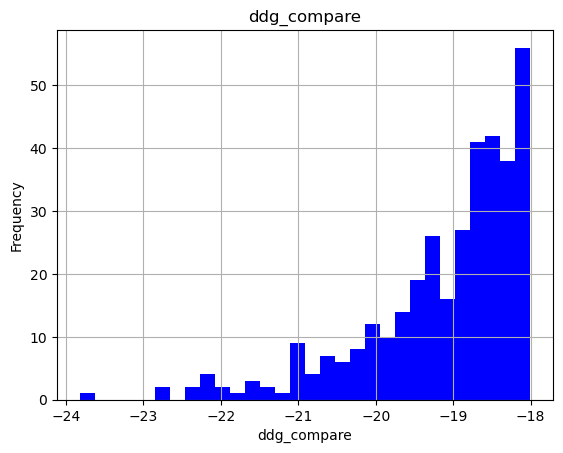

In [48]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddg_compare')
plt.ylabel('Frequency')
plt.title('ddg_compare')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [49]:
df_general_high_hbonds

file_initial  \
10238    /scratch/abgvg9/discovery_results/antagonists/4876/placements/4s0v_receptor_only_PV-000284893433_3_0.pdb   
94347    /scratch/abgvg9/discovery_results/antagonists/5837/placements/4s0v_receptor_only_PV-000538661374_4_1.pdb   
94506    /scratch/abgvg9/discovery_results/antagonists/5837/placements/4s0v_receptor_only_PV-000538661374_4_1.pdb   
94550    /scratch/abgvg9/discovery_results/antagonists/5837/placements/4s0v_receptor_only_PV-000538661374_4_1.pdb   
94572    /scratch/abgvg9/discovery_results/antagonists/5837/placements/4s0v_receptor_only_PV-000538661374_4_1.pdb   
...                                                                                                           ...   
4714850     /scratch/abgvg9/discovery_results/antagonists/1491/placements/4s0v_receptor_only_Z741186566_15_10.pdb   
4715949      /scratch/abgvg9/discovery_results/antagonists/1491/placements/4s0v_receptor_only_Z741186566_15_6.pdb   
4717048      /scratch/abgvg9/discovery_results/antagonists/1491/placements/4s0v_receptor_only_Z741186566_15_3.pdb   
4718147      /scratch/abgvg9/discovery_results/antagonists/1491/placements/4s0v_receptor_only_Z741186566_15_8.pdb   
4732634      /scratch/abgvg9/discovery_results/antagonists/11385/placements/4s0v_receptor_only_Z854493106_5_9.pdb   

                                                                                                                                                                                      file_compare  \
10238     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000284893433/placements/4s0v_receptor_only_PV-000284893433_63_3.pdb   
94347     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000538661374/placements/4s0v_receptor_only_PV-000538661374_24_2.pdb   
94506    /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000538661374/placements/4s0v_receptor_only_PV-000538661374_168_2.pdb   
94550     /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000538661374/placements/4s0v_receptor_only_PV-000538661374_76_3.pdb   
94572    /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/PV-000538661374/placements/4s0v_receptor_only_PV-000538661374_222_1.pdb   
...                                                                                                                                                                                            ...   
4714850             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z741186566/placements/4s0v_receptor_only_Z741186566_82_2.pdb   
4715949             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z741186566/placements/4s0v_receptor_only_Z741186566_82_2.pdb   
4717048             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z741186566/placements/4s0v_receptor_only_Z741186566_82_2.pdb   
4718147             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z741186566/placements/4s0v_receptor_only_Z741186566_82_2.pdb   
4732634             /scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg/Z854493106/placements/4s0v_receptor_only_Z854493106_2_11.pdb   

         ddg_initial  ddg_compare  ddg_delta  total_motifs_initial  \
10238     -18.040646   -18.084965   0.044319                   7.0   
94347     -16.181013   -18.434743   2.253730                   8.0   
94506     -16.181013   -19.217223   3.036210                   8.0   
94550     -16.181013   -19.520224   3.3

In [50]:
len(df_general_high_hbonds)

353

In [51]:
# Extract ligand names using a regular expression
df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'4s0v_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_general_high_hbonds['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-000284893433' 'PV-000538661374' 'PV-000555056414' 'PV-000555062637'
 'PV-000555101582' 'PV-000555266033' 'PV-000555995079' 'PV-000555996188'
 'PV-000556085434' 'PV-000574352410' 'PV-001144636359' 'PV-001189669321'
 'PV-001566826299' 'PV-001790934432' 'PV-002182191204' 'PV-002353454027'
 'PV-002738102521' 'PV-002750714394' 'PV-002917332671' 'PV-003064601637'
 'PV-003148995569' 'PV-003239324501' 'PV-003461358092' 'PV-003481999522'
 'PV-003657695826' 'PV-003790498879' 'PV-004266778217' 'PV-004283803145'
 'PV-004309183058' 'PV-004314341404' 'PV-004318818801' 'PV-004404150802'
 'PV-004455271886' 'PV-004495267170' 'PV-004504184115' 'PV-004509628975'
 'PV-004512490590' 'PV-004526646013' 'PV-004545227678' 'PV-004559340445'
 'PV-004565289367' 'PV-004590143981' 'PV-004617269075' 'PV-004632151949'
 'PV-004635001835' 'PV-004647103010' 'PV-004653864397' 'PV-004667420170'
 'PV-004714696678' 'PV-004736035082' 'PV-004777589685' 'PV-004830127900'
 'PV-004833489258' 'PV-0049020

/scratch/local/ipykernel_33783/2743136754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'4s0v_receptor_only_(.+?)_\d+_\d+\.pdb')


In [52]:
#this code block copies the original and refined select best placements to the output_location destination

line_counter = 0
folder_counter = 0

output_location = "/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/"

if output_location.endswith("/") == False:
    output_location = output_location + "/"

for index, row in df_general_high_hbonds.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + output_location + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + output_location + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + output_location + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1

00000_initial_4s0v_receptor_only_PV-000284893433_3_0.pdb 00000_compare_4s0v_receptor_only_PV-000284893433_63_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00001_initial_4s0v_receptor_only_PV-000538661374_4_1.pdb 00001_compare_4s0v_receptor_only_PV-000538661374_24_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00002_initial_4s0v_receptor_only_PV-000538661374_4_1.pdb 00002_compare_4s0v_receptor_only_PV-000538661374_168_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00003_initial_4s0v_receptor_only_PV-000538661374_4_1.pdb 00003_compare_4s0v_receptor_only_PV-000538661374_76_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00004_initial_4s0v_receptor_only_PV-000538661374_4_1.pdb 00004_compare_4s0v_receptor_only_PV-000538661374_222_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00005_initial_4s0v_receptor_only_PV-000538661374_4_1.pdb 00005_compare_4s0v_receptor_only_PV-000538661374_73_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00006_initial_4s0v_receptor_only_PV-000555056414_11_3.pdb 00006_compare_4s0v_receptor_only_PV-000555056414_167_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00007_initial_4s0v_receptor_only_PV-000555062637_11_0.pdb 00007_compare_4s0v_receptor_only_PV-000555062637_16_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00008_initial_4s0v_receptor_only_PV-000555062637_11_0.pdb 00008_compare_4s0v_receptor_only_PV-000555062637_89_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00009_initial_4s0v_receptor_only_PV-000555062637_11_0.pdb 00009_compare_4s0v_receptor_only_PV-000555062637_16_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00010_initial_4s0v_receptor_only_PV-000555062637_11_0.pdb 00010_compare_4s0v_receptor_only_PV-000555062637_16_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00011_initial_4s0v_receptor_only_PV-000555101582_2_4.pdb 00011_compare_4s0v_receptor_only_PV-000555101582_89_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00012_initial_4s0v_receptor_only_PV-000555266033_4_7.pdb 00012_compare_4s0v_receptor_only_PV-000555266033_167_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00013_initial_4s0v_receptor_only_PV-000555266033_4_7.pdb 00013_compare_4s0v_receptor_only_PV-000555266033_94_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00014_initial_4s0v_receptor_only_PV-000555995079_11_0.pdb 00014_compare_4s0v_receptor_only_PV-000555995079_48_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00015_initial_4s0v_receptor_only_PV-000555995079_10_6.pdb 00015_compare_4s0v_receptor_only_PV-000555995079_48_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00016_initial_4s0v_receptor_only_PV-000555996188_11_1.pdb 00016_compare_4s0v_receptor_only_PV-000555996188_20_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00017_initial_4s0v_receptor_only_PV-000556085434_9_5.pdb 00017_compare_4s0v_receptor_only_PV-000556085434_14_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00018_initial_4s0v_receptor_only_PV-000574352410_12_2.pdb 00018_compare_4s0v_receptor_only_PV-000574352410_14_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00019_initial_4s0v_receptor_only_PV-001144636359_4_3.pdb 00019_compare_4s0v_receptor_only_PV-001144636359_229_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00020_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00020_compare_4s0v_receptor_only_PV-001189669321_1_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00021_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00021_compare_4s0v_receptor_only_PV-001189669321_83_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00022_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00022_compare_4s0v_receptor_only_PV-001189669321_2_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00023_initial_4s0v_receptor_only_PV-001189669321_1_0.pdb 00023_compare_4s0v_receptor_only_PV-001189669321_39_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00024_initial_4s0v_receptor_only_PV-001566826299_4_0.pdb 00024_compare_4s0v_receptor_only_PV-001566826299_103_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00025_initial_4s0v_receptor_only_PV-001566826299_4_0.pdb 00025_compare_4s0v_receptor_only_PV-001566826299_199_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00026_initial_4s0v_receptor_only_PV-001790934432_6_0.pdb 00026_compare_4s0v_receptor_only_PV-001790934432_42_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00027_initial_4s0v_receptor_only_PV-002182191204_1_3.pdb 00027_compare_4s0v_receptor_only_PV-002182191204_24_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00028_initial_4s0v_receptor_only_PV-002353454027_8_2.pdb 00028_compare_4s0v_receptor_only_PV-002353454027_88_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00029_initial_4s0v_receptor_only_PV-002738102521_5_2.pdb 00029_compare_4s0v_receptor_only_PV-002738102521_18_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00030_initial_4s0v_receptor_only_PV-002750714394_13_6.pdb 00030_compare_4s0v_receptor_only_PV-002750714394_4_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00031_initial_4s0v_receptor_only_PV-002917332671_2_3.pdb 00031_compare_4s0v_receptor_only_PV-002917332671_201_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00032_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00032_compare_4s0v_receptor_only_PV-003064601637_155_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00033_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00033_compare_4s0v_receptor_only_PV-003064601637_30_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00034_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00034_compare_4s0v_receptor_only_PV-003064601637_181_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00035_initial_4s0v_receptor_only_PV-003064601637_7_4.pdb 00035_compare_4s0v_receptor_only_PV-003064601637_84_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00036_initial_4s0v_receptor_only_PV-003148995569_6_8.pdb 00036_compare_4s0v_receptor_only_PV-003148995569_13_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00037_initial_4s0v_receptor_only_PV-003148995569_6_2.pdb 00037_compare_4s0v_receptor_only_PV-003148995569_13_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00038_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00038_compare_4s0v_receptor_only_PV-003239324501_17_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00039_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00039_compare_4s0v_receptor_only_PV-003239324501_102_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00040_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00040_compare_4s0v_receptor_only_PV-003239324501_97_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00041_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00041_compare_4s0v_receptor_only_PV-003239324501_97_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00042_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00042_compare_4s0v_receptor_only_PV-003239324501_22_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00043_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00043_compare_4s0v_receptor_only_PV-003239324501_22_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00044_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00044_compare_4s0v_receptor_only_PV-003239324501_22_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00045_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00045_compare_4s0v_receptor_only_PV-003239324501_97_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00046_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00046_compare_4s0v_receptor_only_PV-003239324501_126_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00047_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00047_compare_4s0v_receptor_only_PV-003239324501_22_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00048_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00048_compare_4s0v_receptor_only_PV-003239324501_102_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/0’: File exists


00049_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00049_compare_4s0v_receptor_only_PV-003239324501_172_3.pdb
00050_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00050_compare_4s0v_receptor_only_PV-003239324501_17_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00051_initial_4s0v_receptor_only_PV-003239324501_11_5.pdb 00051_compare_4s0v_receptor_only_PV-003239324501_102_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00052_initial_4s0v_receptor_only_PV-003461358092_9_5.pdb 00052_compare_4s0v_receptor_only_PV-003461358092_19_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00053_initial_4s0v_receptor_only_PV-003461358092_9_5.pdb 00053_compare_4s0v_receptor_only_PV-003461358092_19_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00054_initial_4s0v_receptor_only_PV-003461358092_9_5.pdb 00054_compare_4s0v_receptor_only_PV-003461358092_190_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00055_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00055_compare_4s0v_receptor_only_PV-003481999522_121_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00056_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00056_compare_4s0v_receptor_only_PV-003481999522_19_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00057_initial_4s0v_receptor_only_PV-003481999522_1_6.pdb 00057_compare_4s0v_receptor_only_PV-003481999522_23_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00058_initial_4s0v_receptor_only_PV-003657695826_10_5.pdb 00058_compare_4s0v_receptor_only_PV-003657695826_11_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00059_initial_4s0v_receptor_only_PV-003657695826_10_5.pdb 00059_compare_4s0v_receptor_only_PV-003657695826_9_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00060_initial_4s0v_receptor_only_PV-003790498879_10_6.pdb 00060_compare_4s0v_receptor_only_PV-003790498879_179_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00061_initial_4s0v_receptor_only_PV-004266778217_4_2.pdb 00061_compare_4s0v_receptor_only_PV-004266778217_172_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00062_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00062_compare_4s0v_receptor_only_PV-004283803145_82_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00063_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00063_compare_4s0v_receptor_only_PV-004283803145_94_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00064_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00064_compare_4s0v_receptor_only_PV-004283803145_129_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00065_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00065_compare_4s0v_receptor_only_PV-004283803145_129_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00066_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00066_compare_4s0v_receptor_only_PV-004283803145_159_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00067_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00067_compare_4s0v_receptor_only_PV-004283803145_130_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00068_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00068_compare_4s0v_receptor_only_PV-004283803145_94_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00069_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00069_compare_4s0v_receptor_only_PV-004283803145_159_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00070_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00070_compare_4s0v_receptor_only_PV-004283803145_97_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00071_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00071_compare_4s0v_receptor_only_PV-004283803145_96_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00072_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00072_compare_4s0v_receptor_only_PV-004283803145_108_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00073_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00073_compare_4s0v_receptor_only_PV-004283803145_129_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00074_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00074_compare_4s0v_receptor_only_PV-004283803145_129_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00075_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00075_compare_4s0v_receptor_only_PV-004283803145_96_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00076_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00076_compare_4s0v_receptor_only_PV-004283803145_130_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00077_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00077_compare_4s0v_receptor_only_PV-004283803145_97_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00078_initial_4s0v_receptor_only_PV-004283803145_3_1.pdb 00078_compare_4s0v_receptor_only_PV-004283803145_130_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00079_initial_4s0v_receptor_only_PV-004309183058_4_7.pdb 00079_compare_4s0v_receptor_only_PV-004309183058_35_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00080_initial_4s0v_receptor_only_PV-004309183058_4_7.pdb 00080_compare_4s0v_receptor_only_PV-004309183058_63_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00081_initial_4s0v_receptor_only_PV-004309183058_4_8.pdb 00081_compare_4s0v_receptor_only_PV-004309183058_35_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00082_initial_4s0v_receptor_only_PV-004309183058_4_8.pdb 00082_compare_4s0v_receptor_only_PV-004309183058_63_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00083_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00083_compare_4s0v_receptor_only_PV-004314341404_11_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00084_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00084_compare_4s0v_receptor_only_PV-004314341404_17_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00085_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00085_compare_4s0v_receptor_only_PV-004314341404_196_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00086_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00086_compare_4s0v_receptor_only_PV-004314341404_7_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00087_initial_4s0v_receptor_only_PV-004314341404_1_1.pdb 00087_compare_4s0v_receptor_only_PV-004314341404_16_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00088_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00088_compare_4s0v_receptor_only_PV-004318818801_64_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00089_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00089_compare_4s0v_receptor_only_PV-004318818801_162_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00090_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00090_compare_4s0v_receptor_only_PV-004318818801_161_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00091_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00091_compare_4s0v_receptor_only_PV-004318818801_163_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00092_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00092_compare_4s0v_receptor_only_PV-004318818801_163_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00093_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00093_compare_4s0v_receptor_only_PV-004318818801_62_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00094_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00094_compare_4s0v_receptor_only_PV-004318818801_48_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00095_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00095_compare_4s0v_receptor_only_PV-004318818801_188_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00096_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00096_compare_4s0v_receptor_only_PV-004318818801_193_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00097_initial_4s0v_receptor_only_PV-004318818801_2_0.pdb 00097_compare_4s0v_receptor_only_PV-004318818801_163_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00098_initial_4s0v_receptor_only_PV-004404150802_4_1.pdb 00098_compare_4s0v_receptor_only_PV-004404150802_13_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/1’: File exists


00099_initial_4s0v_receptor_only_PV-004455271886_9_5.pdb 00099_compare_4s0v_receptor_only_PV-004455271886_119_2.pdb
00100_initial_4s0v_receptor_only_PV-004495267170_9_3.pdb 00100_compare_4s0v_receptor_only_PV-004495267170_91_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00101_initial_4s0v_receptor_only_PV-004504184115_5_9.pdb 00101_compare_4s0v_receptor_only_PV-004504184115_102_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00102_initial_4s0v_receptor_only_PV-004509628975_2_0.pdb 00102_compare_4s0v_receptor_only_PV-004509628975_62_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00103_initial_4s0v_receptor_only_PV-004512490590_3_3.pdb 00103_compare_4s0v_receptor_only_PV-004512490590_28_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00104_initial_4s0v_receptor_only_PV-004512490590_3_4.pdb 00104_compare_4s0v_receptor_only_PV-004512490590_28_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00105_initial_4s0v_receptor_only_PV-004526646013_2_0.pdb 00105_compare_4s0v_receptor_only_PV-004526646013_67_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00106_initial_4s0v_receptor_only_PV-004545227678_9_2.pdb 00106_compare_4s0v_receptor_only_PV-004545227678_14_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00107_initial_4s0v_receptor_only_PV-004559340445_9_1.pdb 00107_compare_4s0v_receptor_only_PV-004559340445_36_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00108_initial_4s0v_receptor_only_PV-004565289367_2_6.pdb 00108_compare_4s0v_receptor_only_PV-004565289367_17_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00109_initial_4s0v_receptor_only_PV-004590143981_12_5.pdb 00109_compare_4s0v_receptor_only_PV-004590143981_5_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00110_initial_4s0v_receptor_only_PV-004590143981_12_5.pdb 00110_compare_4s0v_receptor_only_PV-004590143981_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00111_initial_4s0v_receptor_only_PV-004617269075_7_0.pdb 00111_compare_4s0v_receptor_only_PV-004617269075_22_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00112_initial_4s0v_receptor_only_PV-004617269075_7_0.pdb 00112_compare_4s0v_receptor_only_PV-004617269075_17_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00113_initial_4s0v_receptor_only_PV-004632151949_3_0.pdb 00113_compare_4s0v_receptor_only_PV-004632151949_16_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00114_initial_4s0v_receptor_only_PV-004632151949_3_0.pdb 00114_compare_4s0v_receptor_only_PV-004632151949_16_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00115_initial_4s0v_receptor_only_PV-004632151949_1_0.pdb 00115_compare_4s0v_receptor_only_PV-004632151949_16_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00116_initial_4s0v_receptor_only_PV-004632151949_1_0.pdb 00116_compare_4s0v_receptor_only_PV-004632151949_16_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00117_initial_4s0v_receptor_only_PV-004635001835_1_11.pdb 00117_compare_4s0v_receptor_only_PV-004635001835_148_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00118_initial_4s0v_receptor_only_PV-004635001835_1_11.pdb 00118_compare_4s0v_receptor_only_PV-004635001835_144_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00119_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00119_compare_4s0v_receptor_only_PV-004647103010_15_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00120_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00120_compare_4s0v_receptor_only_PV-004647103010_15_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00121_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00121_compare_4s0v_receptor_only_PV-004647103010_195_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00122_initial_4s0v_receptor_only_PV-004647103010_5_2.pdb 00122_compare_4s0v_receptor_only_PV-004647103010_216_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00123_initial_4s0v_receptor_only_PV-004653864397_10_3.pdb 00123_compare_4s0v_receptor_only_PV-004653864397_6_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00124_initial_4s0v_receptor_only_PV-004653864397_10_3.pdb 00124_compare_4s0v_receptor_only_PV-004653864397_6_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00125_initial_4s0v_receptor_only_PV-004653864397_10_3.pdb 00125_compare_4s0v_receptor_only_PV-004653864397_5_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00126_initial_4s0v_receptor_only_PV-004653864397_10_3.pdb 00126_compare_4s0v_receptor_only_PV-004653864397_6_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00127_initial_4s0v_receptor_only_PV-004667420170_3_0.pdb 00127_compare_4s0v_receptor_only_PV-004667420170_46_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00128_initial_4s0v_receptor_only_PV-004667420170_3_1.pdb 00128_compare_4s0v_receptor_only_PV-004667420170_46_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00129_initial_4s0v_receptor_only_PV-004714696678_7_3.pdb 00129_compare_4s0v_receptor_only_PV-004714696678_147_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00130_initial_4s0v_receptor_only_PV-004736035082_2_3.pdb 00130_compare_4s0v_receptor_only_PV-004736035082_189_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00131_initial_4s0v_receptor_only_PV-004777589685_5_1.pdb 00131_compare_4s0v_receptor_only_PV-004777589685_90_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00132_initial_4s0v_receptor_only_PV-004830127900_3_2.pdb 00132_compare_4s0v_receptor_only_PV-004830127900_6_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00133_initial_4s0v_receptor_only_PV-004830127900_3_2.pdb 00133_compare_4s0v_receptor_only_PV-004830127900_4_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00134_initial_4s0v_receptor_only_PV-004833489258_4_0.pdb 00134_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00135_initial_4s0v_receptor_only_PV-004833489258_4_1.pdb 00135_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00136_initial_4s0v_receptor_only_PV-004833489258_7_7.pdb 00136_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00137_initial_4s0v_receptor_only_PV-004833489258_7_0.pdb 00137_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00138_initial_4s0v_receptor_only_PV-004833489258_7_6.pdb 00138_compare_4s0v_receptor_only_PV-004833489258_170_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00139_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00139_compare_4s0v_receptor_only_PV-004902078941_173_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00140_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00140_compare_4s0v_receptor_only_PV-004902078941_56_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00141_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00141_compare_4s0v_receptor_only_PV-004902078941_173_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00142_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00142_compare_4s0v_receptor_only_PV-004902078941_128_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00143_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00143_compare_4s0v_receptor_only_PV-004902078941_56_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00144_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00144_compare_4s0v_receptor_only_PV-004902078941_147_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00145_initial_4s0v_receptor_only_PV-004902078941_12_2.pdb 00145_compare_4s0v_receptor_only_PV-004902078941_174_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00146_initial_4s0v_receptor_only_PV-004902693523_11_2.pdb 00146_compare_4s0v_receptor_only_PV-004902693523_59_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00147_initial_4s0v_receptor_only_PV-004968801968_7_27.pdb 00147_compare_4s0v_receptor_only_PV-004968801968_51_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00148_initial_4s0v_receptor_only_PV-004968801968_7_29.pdb 00148_compare_4s0v_receptor_only_PV-004968801968_51_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/2’: File exists


00149_initial_4s0v_receptor_only_PV-004968801968_7_24.pdb 00149_compare_4s0v_receptor_only_PV-004968801968_51_12.pdb
00150_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00150_compare_4s0v_receptor_only_PV-004979785411_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00151_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00151_compare_4s0v_receptor_only_PV-004979785411_28_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00152_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00152_compare_4s0v_receptor_only_PV-004979785411_29_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00153_initial_4s0v_receptor_only_PV-004979785411_10_1.pdb 00153_compare_4s0v_receptor_only_PV-004979785411_4_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00154_initial_4s0v_receptor_only_PV-004980524796_3_0.pdb 00154_compare_4s0v_receptor_only_PV-004980524796_16_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00155_initial_4s0v_receptor_only_PV-005001900277_5_2.pdb 00155_compare_4s0v_receptor_only_PV-005001900277_67_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00156_initial_4s0v_receptor_only_PV-005022218283_8_6.pdb 00156_compare_4s0v_receptor_only_PV-005022218283_5_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00157_initial_4s0v_receptor_only_PV-005022218283_8_6.pdb 00157_compare_4s0v_receptor_only_PV-005022218283_5_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00158_initial_4s0v_receptor_only_PV-005022218283_8_6.pdb 00158_compare_4s0v_receptor_only_PV-005022218283_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00159_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00159_compare_4s0v_receptor_only_PV-005068406776_138_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00160_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00160_compare_4s0v_receptor_only_PV-005068406776_40_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00161_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00161_compare_4s0v_receptor_only_PV-005068406776_158_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00162_initial_4s0v_receptor_only_PV-005068406776_6_1.pdb 00162_compare_4s0v_receptor_only_PV-005068406776_46_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00163_initial_4s0v_receptor_only_PV-005068406776_6_0.pdb 00163_compare_4s0v_receptor_only_PV-005068406776_138_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00164_initial_4s0v_receptor_only_PV-005068406776_6_0.pdb 00164_compare_4s0v_receptor_only_PV-005068406776_40_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00165_initial_4s0v_receptor_only_PV-005068406776_6_0.pdb 00165_compare_4s0v_receptor_only_PV-005068406776_158_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00166_initial_4s0v_receptor_only_PV-005068406776_6_0.pdb 00166_compare_4s0v_receptor_only_PV-005068406776_46_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00167_initial_4s0v_receptor_only_PV-005092604829_5_2.pdb 00167_compare_4s0v_receptor_only_PV-005092604829_8_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00168_initial_4s0v_receptor_only_PV-005101227942_6_2.pdb 00168_compare_4s0v_receptor_only_PV-005101227942_160_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00169_initial_4s0v_receptor_only_PV-005101227942_6_2.pdb 00169_compare_4s0v_receptor_only_PV-005101227942_55_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00170_initial_4s0v_receptor_only_PV-005101227942_6_2.pdb 00170_compare_4s0v_receptor_only_PV-005101227942_114_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00171_initial_4s0v_receptor_only_PV-005101227942_6_2.pdb 00171_compare_4s0v_receptor_only_PV-005101227942_51_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00172_initial_4s0v_receptor_only_PV-005101227942_6_2.pdb 00172_compare_4s0v_receptor_only_PV-005101227942_55_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00173_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00173_compare_4s0v_receptor_only_PV-005143787306_32_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00174_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00174_compare_4s0v_receptor_only_PV-005143787306_174_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00175_initial_4s0v_receptor_only_PV-005143787306_11_4.pdb 00175_compare_4s0v_receptor_only_PV-005143787306_84_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00176_initial_4s0v_receptor_only_PV-005199941095_10_5.pdb 00176_compare_4s0v_receptor_only_PV-005199941095_12_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00177_initial_4s0v_receptor_only_PV-005359393356_6_1.pdb 00177_compare_4s0v_receptor_only_PV-005359393356_28_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00178_initial_4s0v_receptor_only_PV-005475741320_3_1.pdb 00178_compare_4s0v_receptor_only_PV-005475741320_164_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00179_initial_4s0v_receptor_only_PV-005543300108_11_12.pdb 00179_compare_4s0v_receptor_only_PV-005543300108_108_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00180_initial_4s0v_receptor_only_PV-005593495682_8_1.pdb 00180_compare_4s0v_receptor_only_PV-005593495682_147_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00181_initial_4s0v_receptor_only_PV-005593495682_8_2.pdb 00181_compare_4s0v_receptor_only_PV-005593495682_147_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00182_initial_4s0v_receptor_only_PV-005654890433_4_2.pdb 00182_compare_4s0v_receptor_only_PV-005654890433_38_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00183_initial_4s0v_receptor_only_PV-005704166968_2_3.pdb 00183_compare_4s0v_receptor_only_PV-005704166968_205_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00184_initial_4s0v_receptor_only_PV-005704166968_2_3.pdb 00184_compare_4s0v_receptor_only_PV-005704166968_205_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00185_initial_4s0v_receptor_only_PV-005709335612_4_1.pdb 00185_compare_4s0v_receptor_only_PV-005709335612_82_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00186_initial_4s0v_receptor_only_PV-005709335612_4_1.pdb 00186_compare_4s0v_receptor_only_PV-005709335612_82_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00187_initial_4s0v_receptor_only_PV-005710347400_2_5.pdb 00187_compare_4s0v_receptor_only_PV-005710347400_23_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00188_initial_4s0v_receptor_only_PV-005723465377_5_2.pdb 00188_compare_4s0v_receptor_only_PV-005723465377_230_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00189_initial_4s0v_receptor_only_PV-005723465377_5_3.pdb 00189_compare_4s0v_receptor_only_PV-005723465377_230_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00190_initial_4s0v_receptor_only_PV-005762976706_7_3.pdb 00190_compare_4s0v_receptor_only_PV-005762976706_172_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00191_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00191_compare_4s0v_receptor_only_PV-005765951985_134_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00192_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00192_compare_4s0v_receptor_only_PV-005765951985_118_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00193_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00193_compare_4s0v_receptor_only_PV-005765951985_13_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00194_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00194_compare_4s0v_receptor_only_PV-005765951985_13_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00195_initial_4s0v_receptor_only_PV-005765951985_5_1.pdb 00195_compare_4s0v_receptor_only_PV-005765951985_13_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00196_initial_4s0v_receptor_only_PV-005778242094_11_1.pdb 00196_compare_4s0v_receptor_only_PV-005778242094_181_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00197_initial_4s0v_receptor_only_PV-005844559394_3_3.pdb 00197_compare_4s0v_receptor_only_PV-005844559394_179_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00198_initial_4s0v_receptor_only_PV-005923920199_11_1.pdb 00198_compare_4s0v_receptor_only_PV-005923920199_18_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/3’: File exists


00199_initial_4s0v_receptor_only_PV-005930571439_6_1.pdb 00199_compare_4s0v_receptor_only_PV-005930571439_52_2.pdb
00200_initial_4s0v_receptor_only_PV-005930571439_11_0.pdb 00200_compare_4s0v_receptor_only_PV-005930571439_52_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00201_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00201_compare_4s0v_receptor_only_PV-005932782926_25_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00202_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00202_compare_4s0v_receptor_only_PV-005932782926_26_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00203_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00203_compare_4s0v_receptor_only_PV-005932782926_25_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00204_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00204_compare_4s0v_receptor_only_PV-005932782926_26_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00205_initial_4s0v_receptor_only_PV-005932782926_7_5.pdb 00205_compare_4s0v_receptor_only_PV-005932782926_25_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00206_initial_4s0v_receptor_only_PV-005941895645_9_1.pdb 00206_compare_4s0v_receptor_only_PV-005941895645_124_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00207_initial_4s0v_receptor_only_PV-005989213522_4_23.pdb 00207_compare_4s0v_receptor_only_PV-005989213522_56_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00208_initial_4s0v_receptor_only_PV-006012559544_3_1.pdb 00208_compare_4s0v_receptor_only_PV-006012559544_55_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00209_initial_4s0v_receptor_only_PV-006018380064_3_0.pdb 00209_compare_4s0v_receptor_only_PV-006018380064_16_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00210_initial_4s0v_receptor_only_PV-006043815362_6_8.pdb 00210_compare_4s0v_receptor_only_PV-006043815362_39_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00211_initial_4s0v_receptor_only_PV-006043815362_6_8.pdb 00211_compare_4s0v_receptor_only_PV-006043815362_36_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00212_initial_4s0v_receptor_only_PV-006043815362_6_8.pdb 00212_compare_4s0v_receptor_only_PV-006043815362_41_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00213_initial_4s0v_receptor_only_PV-006043815362_6_8.pdb 00213_compare_4s0v_receptor_only_PV-006043815362_41_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00214_initial_4s0v_receptor_only_PV-006043815362_6_8.pdb 00214_compare_4s0v_receptor_only_PV-006043815362_41_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00215_initial_4s0v_receptor_only_PV-006043815362_6_8.pdb 00215_compare_4s0v_receptor_only_PV-006043815362_41_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00216_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00216_compare_4s0v_receptor_only_PV-006045228088_13_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00217_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00217_compare_4s0v_receptor_only_PV-006045228088_13_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00218_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00218_compare_4s0v_receptor_only_PV-006045228088_13_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00219_initial_4s0v_receptor_only_PV-006045228088_2_5.pdb 00219_compare_4s0v_receptor_only_PV-006045228088_13_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00220_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00220_compare_4s0v_receptor_only_PV-006045228088_13_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00221_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00221_compare_4s0v_receptor_only_PV-006045228088_13_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00222_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00222_compare_4s0v_receptor_only_PV-006045228088_13_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00223_initial_4s0v_receptor_only_PV-006045228088_2_1.pdb 00223_compare_4s0v_receptor_only_PV-006045228088_13_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00224_initial_4s0v_receptor_only_PV-006045324688_14_4.pdb 00224_compare_4s0v_receptor_only_PV-006045324688_111_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00225_initial_4s0v_receptor_only_PV-006049440488_6_5.pdb 00225_compare_4s0v_receptor_only_PV-006049440488_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00226_initial_4s0v_receptor_only_PV-006049440488_6_5.pdb 00226_compare_4s0v_receptor_only_PV-006049440488_95_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00227_initial_4s0v_receptor_only_PV-006049440488_6_5.pdb 00227_compare_4s0v_receptor_only_PV-006049440488_5_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00228_initial_4s0v_receptor_only_PV-006049440488_6_5.pdb 00228_compare_4s0v_receptor_only_PV-006049440488_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00229_initial_4s0v_receptor_only_PV-006049440488_6_1.pdb 00229_compare_4s0v_receptor_only_PV-006049440488_5_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00230_initial_4s0v_receptor_only_PV-006049440488_6_1.pdb 00230_compare_4s0v_receptor_only_PV-006049440488_95_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00231_initial_4s0v_receptor_only_PV-006049440488_6_1.pdb 00231_compare_4s0v_receptor_only_PV-006049440488_5_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00232_initial_4s0v_receptor_only_PV-006049440488_6_1.pdb 00232_compare_4s0v_receptor_only_PV-006049440488_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00233_initial_4s0v_receptor_only_PV-006070247290_3_5.pdb 00233_compare_4s0v_receptor_only_PV-006070247290_11_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00234_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00234_compare_4s0v_receptor_only_PV-006073163010_23_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00235_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00235_compare_4s0v_receptor_only_PV-006073163010_27_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00236_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00236_compare_4s0v_receptor_only_PV-006073163010_16_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00237_initial_4s0v_receptor_only_PV-006073163010_5_11.pdb 00237_compare_4s0v_receptor_only_PV-006073163010_162_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00238_initial_4s0v_receptor_only_PV-006073163010_5_14.pdb 00238_compare_4s0v_receptor_only_PV-006073163010_23_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00239_initial_4s0v_receptor_only_PV-006073163010_5_14.pdb 00239_compare_4s0v_receptor_only_PV-006073163010_16_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00240_initial_4s0v_receptor_only_PV-006073163010_5_14.pdb 00240_compare_4s0v_receptor_only_PV-006073163010_162_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00241_initial_4s0v_receptor_only_PV-006085280196_3_1.pdb 00241_compare_4s0v_receptor_only_PV-006085280196_157_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00242_initial_4s0v_receptor_only_PV-006085280196_3_1.pdb 00242_compare_4s0v_receptor_only_PV-006085280196_155_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00243_initial_4s0v_receptor_only_PV-006085280196_3_1.pdb 00243_compare_4s0v_receptor_only_PV-006085280196_155_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00244_initial_4s0v_receptor_only_PV-006101404354_6_8.pdb 00244_compare_4s0v_receptor_only_PV-006101404354_13_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00245_initial_4s0v_receptor_only_PV-006101404354_6_8.pdb 00245_compare_4s0v_receptor_only_PV-006101404354_45_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00246_initial_4s0v_receptor_only_PV-006189019059_8_4.pdb 00246_compare_4s0v_receptor_only_PV-006189019059_173_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00247_initial_4s0v_receptor_only_PV-006189019059_8_1.pdb 00247_compare_4s0v_receptor_only_PV-006189019059_173_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00248_initial_4s0v_receptor_only_PV-006208991829_8_0.pdb 00248_compare_4s0v_receptor_only_PV-006208991829_64_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/4’: File exists


00249_initial_4s0v_receptor_only_PV-006211715944_7_0.pdb 00249_compare_4s0v_receptor_only_PV-006211715944_69_0.pdb
00250_initial_4s0v_receptor_only_PV-006217076466_1_1.pdb 00250_compare_4s0v_receptor_only_PV-006217076466_108_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00251_initial_4s0v_receptor_only_PV-006217076466_1_1.pdb 00251_compare_4s0v_receptor_only_PV-006217076466_235_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00252_initial_4s0v_receptor_only_PV-006217076466_1_1.pdb 00252_compare_4s0v_receptor_only_PV-006217076466_99_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00253_initial_4s0v_receptor_only_PV-006217076466_1_0.pdb 00253_compare_4s0v_receptor_only_PV-006217076466_47_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00254_initial_4s0v_receptor_only_PV-006217076466_1_0.pdb 00254_compare_4s0v_receptor_only_PV-006217076466_108_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00255_initial_4s0v_receptor_only_PV-006217076466_1_0.pdb 00255_compare_4s0v_receptor_only_PV-006217076466_235_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00256_initial_4s0v_receptor_only_PV-006217076466_1_0.pdb 00256_compare_4s0v_receptor_only_PV-006217076466_99_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00257_initial_4s0v_receptor_only_PV-006250584625_8_0.pdb 00257_compare_4s0v_receptor_only_PV-006250584625_142_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00258_initial_4s0v_receptor_only_PV-006250584625_8_2.pdb 00258_compare_4s0v_receptor_only_PV-006250584625_142_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00259_initial_4s0v_receptor_only_PV-006253659720_4_14.pdb 00259_compare_4s0v_receptor_only_PV-006253659720_11_55.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00260_initial_4s0v_receptor_only_PV-006253659720_4_20.pdb 00260_compare_4s0v_receptor_only_PV-006253659720_11_55.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00261_initial_4s0v_receptor_only_PV-006254270889_10_0.pdb 00261_compare_4s0v_receptor_only_PV-006254270889_138_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00262_initial_4s0v_receptor_only_PV-006296936625_13_1.pdb 00262_compare_4s0v_receptor_only_PV-006296936625_152_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00263_initial_4s0v_receptor_only_PV-006296936625_13_1.pdb 00263_compare_4s0v_receptor_only_PV-006296936625_98_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00264_initial_4s0v_receptor_only_PV-006296936625_13_0.pdb 00264_compare_4s0v_receptor_only_PV-006296936625_152_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00265_initial_4s0v_receptor_only_PV-006296936625_13_0.pdb 00265_compare_4s0v_receptor_only_PV-006296936625_98_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00266_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00266_compare_4s0v_receptor_only_PV-006305268918_80_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00267_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00267_compare_4s0v_receptor_only_PV-006305268918_80_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00268_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00268_compare_4s0v_receptor_only_PV-006305268918_80_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00269_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00269_compare_4s0v_receptor_only_PV-006305268918_3_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00270_initial_4s0v_receptor_only_PV-006305268918_3_5.pdb 00270_compare_4s0v_receptor_only_PV-006305268918_155_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00271_initial_4s0v_receptor_only_PV-006354182884_2_2.pdb 00271_compare_4s0v_receptor_only_PV-006354182884_33_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00272_initial_4s0v_receptor_only_PV-006367705358_13_5.pdb 00272_compare_4s0v_receptor_only_PV-006367705358_2_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00273_initial_4s0v_receptor_only_PV-006427984626_9_2.pdb 00273_compare_4s0v_receptor_only_PV-006427984626_128_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00274_initial_4s0v_receptor_only_PV-006436100726_10_4.pdb 00274_compare_4s0v_receptor_only_PV-006436100726_21_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00275_initial_4s0v_receptor_only_PV-006436100726_10_3.pdb 00275_compare_4s0v_receptor_only_PV-006436100726_21_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00276_initial_4s0v_receptor_only_PV-006443101270_13_9.pdb 00276_compare_4s0v_receptor_only_PV-006443101270_90_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00277_initial_4s0v_receptor_only_PV-006447553366_4_6.pdb 00277_compare_4s0v_receptor_only_PV-006447553366_187_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00278_initial_4s0v_receptor_only_PV-006517332399_2_7.pdb 00278_compare_4s0v_receptor_only_PV-006517332399_31_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00279_initial_4s0v_receptor_only_PV-006517426018_5_6.pdb 00279_compare_4s0v_receptor_only_PV-006517426018_46_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00280_initial_4s0v_receptor_only_PV-006517426018_5_2.pdb 00280_compare_4s0v_receptor_only_PV-006517426018_46_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00281_initial_4s0v_receptor_only_PV-006552215207_10_0.pdb 00281_compare_4s0v_receptor_only_PV-006552215207_208_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00282_initial_4s0v_receptor_only_PV-006575948657_14_0.pdb 00282_compare_4s0v_receptor_only_PV-006575948657_65_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00283_initial_4s0v_receptor_only_PV-006575948657_14_0.pdb 00283_compare_4s0v_receptor_only_PV-006575948657_14_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00284_initial_4s0v_receptor_only_PV-006575948657_14_0.pdb 00284_compare_4s0v_receptor_only_PV-006575948657_171_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00285_initial_4s0v_receptor_only_PV-006591716350_2_0.pdb 00285_compare_4s0v_receptor_only_PV-006591716350_128_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00286_initial_4s0v_receptor_only_PV-006606652361_7_11.pdb 00286_compare_4s0v_receptor_only_PV-006606652361_147_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00287_initial_4s0v_receptor_only_PV-006660748034_13_3.pdb 00287_compare_4s0v_receptor_only_PV-006660748034_179_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00288_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00288_compare_4s0v_receptor_only_Z1141296323_25_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00289_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00289_compare_4s0v_receptor_only_Z1141296323_126_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00290_initial_4s0v_receptor_only_Z1141296323_5_8.pdb 00290_compare_4s0v_receptor_only_Z1141296323_106_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00291_initial_4s0v_receptor_only_Z1193515828_11_9.pdb 00291_compare_4s0v_receptor_only_Z1193515828_127_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00292_initial_4s0v_receptor_only_Z1267507125_14_3.pdb 00292_compare_4s0v_receptor_only_Z1267507125_125_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00293_initial_4s0v_receptor_only_Z1271373010_2_6.pdb 00293_compare_4s0v_receptor_only_Z1271373010_38_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00294_initial_4s0v_receptor_only_Z1312379811_13_0.pdb 00294_compare_4s0v_receptor_only_Z1312379811_92_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00295_initial_4s0v_receptor_only_Z1318713068_6_7.pdb 00295_compare_4s0v_receptor_only_Z1318713068_218_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00296_initial_4s0v_receptor_only_Z1381863493_9_2.pdb 00296_compare_4s0v_receptor_only_Z1381863493_119_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00297_initial_4s0v_receptor_only_Z1381863493_9_21.pdb 00297_compare_4s0v_receptor_only_Z1381863493_119_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00298_initial_4s0v_receptor_only_Z1410815299_2_2.pdb 00298_compare_4s0v_receptor_only_Z1410815299_26_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/5’: File exists


00299_initial_4s0v_receptor_only_Z1556400276_3_0.pdb 00299_compare_4s0v_receptor_only_Z1556400276_14_0.pdb
00300_initial_4s0v_receptor_only_Z1556400276_3_0.pdb 00300_compare_4s0v_receptor_only_Z1556400276_112_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00301_initial_4s0v_receptor_only_Z1560158433_15_12.pdb 00301_compare_4s0v_receptor_only_Z1560158433_198_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00302_initial_4s0v_receptor_only_Z1666963810_4_10.pdb 00302_compare_4s0v_receptor_only_Z1666963810_9_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00303_initial_4s0v_receptor_only_Z1666963810_4_10.pdb 00303_compare_4s0v_receptor_only_Z1666963810_9_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00304_initial_4s0v_receptor_only_Z1666963810_4_10.pdb 00304_compare_4s0v_receptor_only_Z1666963810_240_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00305_initial_4s0v_receptor_only_Z1666963810_4_10.pdb 00305_compare_4s0v_receptor_only_Z1666963810_58_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00306_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00306_compare_4s0v_receptor_only_Z1666963810_9_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00307_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00307_compare_4s0v_receptor_only_Z1666963810_9_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00308_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00308_compare_4s0v_receptor_only_Z1666963810_240_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00309_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00309_compare_4s0v_receptor_only_Z1666963810_58_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00310_initial_4s0v_receptor_only_Z1666963810_4_4.pdb 00310_compare_4s0v_receptor_only_Z1666963810_236_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00311_initial_4s0v_receptor_only_Z1666963810_4_7.pdb 00311_compare_4s0v_receptor_only_Z1666963810_9_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00312_initial_4s0v_receptor_only_Z1666963810_4_7.pdb 00312_compare_4s0v_receptor_only_Z1666963810_58_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00313_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00313_compare_4s0v_receptor_only_Z1666963810_9_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00314_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00314_compare_4s0v_receptor_only_Z1666963810_9_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00315_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00315_compare_4s0v_receptor_only_Z1666963810_240_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00316_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00316_compare_4s0v_receptor_only_Z1666963810_58_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00317_initial_4s0v_receptor_only_Z1666963810_4_0.pdb 00317_compare_4s0v_receptor_only_Z1666963810_236_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00318_initial_4s0v_receptor_only_Z1928667517_14_2.pdb 00318_compare_4s0v_receptor_only_Z1928667517_119_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00319_initial_4s0v_receptor_only_Z1932631449_10_8.pdb 00319_compare_4s0v_receptor_only_Z1932631449_102_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00320_initial_4s0v_receptor_only_Z1932631449_10_6.pdb 00320_compare_4s0v_receptor_only_Z1932631449_102_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00321_initial_4s0v_receptor_only_Z1984113437_6_6.pdb 00321_compare_4s0v_receptor_only_Z1984113437_210_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00322_initial_4s0v_receptor_only_Z2017244898_13_6.pdb 00322_compare_4s0v_receptor_only_Z2017244898_215_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00323_initial_4s0v_receptor_only_Z2153571979_2_3.pdb 00323_compare_4s0v_receptor_only_Z2153571979_50_17.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00324_initial_4s0v_receptor_only_Z2173284225_10_9.pdb 00324_compare_4s0v_receptor_only_Z2173284225_142_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00325_initial_4s0v_receptor_only_Z2173284225_10_9.pdb 00325_compare_4s0v_receptor_only_Z2173284225_2_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00326_initial_4s0v_receptor_only_Z2274566053_11_8.pdb 00326_compare_4s0v_receptor_only_Z2274566053_93_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00327_initial_4s0v_receptor_only_Z2274566053_11_8.pdb 00327_compare_4s0v_receptor_only_Z2274566053_58_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00328_initial_4s0v_receptor_only_Z2297943948_7_0.pdb 00328_compare_4s0v_receptor_only_Z2297943948_4_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00329_initial_4s0v_receptor_only_Z2297943948_7_0.pdb 00329_compare_4s0v_receptor_only_Z2297943948_5_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00330_initial_4s0v_receptor_only_Z2361968577_5_0.pdb 00330_compare_4s0v_receptor_only_Z2361968577_26_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00331_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00331_compare_4s0v_receptor_only_Z2464302952_27_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00332_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00332_compare_4s0v_receptor_only_Z2464302952_60_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00333_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00333_compare_4s0v_receptor_only_Z2464302952_4_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00334_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00334_compare_4s0v_receptor_only_Z2464302952_58_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00335_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00335_compare_4s0v_receptor_only_Z2464302952_35_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00336_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00336_compare_4s0v_receptor_only_Z2464302952_88_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00337_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00337_compare_4s0v_receptor_only_Z2464302952_90_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00338_initial_4s0v_receptor_only_Z2464302952_4_0.pdb 00338_compare_4s0v_receptor_only_Z2464302952_60_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00339_initial_4s0v_receptor_only_Z3634546201_11_1.pdb 00339_compare_4s0v_receptor_only_Z3634546201_238_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00340_initial_4s0v_receptor_only_Z3634546201_11_1.pdb 00340_compare_4s0v_receptor_only_Z3634546201_92_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00341_initial_4s0v_receptor_only_Z4570380090_7_2.pdb 00341_compare_4s0v_receptor_only_Z4570380090_102_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00342_initial_4s0v_receptor_only_Z4573882550_2_8.pdb 00342_compare_4s0v_receptor_only_Z4573882550_93_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00343_initial_4s0v_receptor_only_Z5043427139_10_20.pdb 00343_compare_4s0v_receptor_only_Z5043427139_18_21.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00344_initial_4s0v_receptor_only_Z613030190_10_4.pdb 00344_compare_4s0v_receptor_only_Z613030190_39_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00345_initial_4s0v_receptor_only_Z740536832_4_9.pdb 00345_compare_4s0v_receptor_only_Z740536832_105_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00346_initial_4s0v_receptor_only_Z740536832_4_9.pdb 00346_compare_4s0v_receptor_only_Z740536832_111_20.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00347_initial_4s0v_receptor_only_Z741186566_15_4.pdb 00347_compare_4s0v_receptor_only_Z741186566_82_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00348_initial_4s0v_receptor_only_Z741186566_15_10.pdb 00348_compare_4s0v_receptor_only_Z741186566_82_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/6’: File exists


00349_initial_4s0v_receptor_only_Z741186566_15_6.pdb 00349_compare_4s0v_receptor_only_Z741186566_82_2.pdb
00350_initial_4s0v_receptor_only_Z741186566_15_3.pdb 00350_compare_4s0v_receptor_only_Z741186566_82_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/7’: File exists


00351_initial_4s0v_receptor_only_Z741186566_15_8.pdb 00351_compare_4s0v_receptor_only_Z741186566_82_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/7’: File exists


00352_initial_4s0v_receptor_only_Z854493106_5_9.pdb 00352_compare_4s0v_receptor_only_Z854493106_2_11.pdb


In [53]:
output_location = "/scratch/abgvg9/discovery_results/antagonists/placements_for_refinement/expanded_conformer_set_placements/low_ddg_best_refined_placements/"

if output_location.endswith("/") == False:
    output_location = output_location + "/"

#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv(output_location + 'low_ddg_best_improved_placements_sheet.csv', index=False)

In [17]:
#look for previous liked "yes" placements in the df_general to see how they did

#NOTE this is the low ddg, and it looks like none of these actually were low ddg initially, run this in the real and hbond doc

previous_yes_placements = ["PV-000574408508","PV-004660274189","PV-004308931941","PV-006612894357","PV-006710354450","PV-006617156758","Z3877772075","PV-006702960116","PV-006713619448"]

filtered_df = df_general[df_general['file_initial'].apply(lambda x: any(substring in x for substring in previous_yes_placements))]

len(filtered_df)

268

In [ ]:
filtered_df

In [ ]:
#below here is old stuff for  reference

In [32]:
#ddg
x = df['hbond_motif_count']
#set labels and title
plt.xlabel('hbond_motif_count')
plt.ylabel('Frequency')
plt.title('hbond_motif_count')
#create 30 bin 1D hsitogram
plt.hist(x, bins=5, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

KeyError: 'hbond_motif_count'

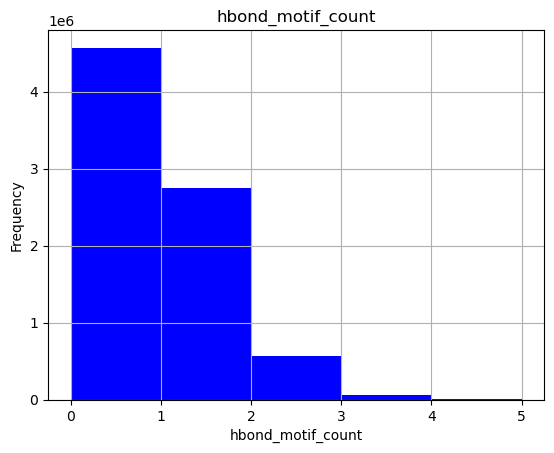

In [6]:
#ddg
x = df_general['hbond_motif_count']
#set labels and title
plt.xlabel('hbond_motif_count')
plt.ylabel('Frequency')
plt.title('hbond_motif_count')
#create 30 bin 1D hsitogram
plt.hist(x, bins=5, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [7]:
#make dataframe with only rosetta hbond count of 4
df_4_hbonds = df[df['hbond_motif_count'] >= 4]
df_4_hbonds = df_4_hbonds.sort_values(by='ddg')

In [8]:
df_4_hbonds

file  \
3987180      4917/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4917/placements/7l1u_receptor_only_PV-006630074224_6_2.pdb   
1200041   11534/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11534/placements/7l1u_receptor_only_PV-006709534647_13_0.pdb   
7524540      9442/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/9442/placements/7l1u_receptor_only_PV-000358429369_2_1.pdb   
4905259      6091/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6091/placements/7l1u_receptor_only_PV-006644138025_5_0.pdb   
4868153     6043/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6043/placements/7l1u_receptor_only_PV-001474966193_11_3.pdb   
6948982      8712/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8712/placements/7l1u_receptor_only_PV-006675501110_7_2.pdb   
6009608      7507/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/7507/placements/7l1u_receptor_only_PV-006661059626_6_0.pdb   
4372162      5407/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5407/placements/7l1u_receptor_only_PV-006635907047_3_0.pdb   
1482459     1189/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1189/placements/7l1u_receptor_only_PV-006081045122_14_1.pdb   
4904783      6091/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6091/placements/7l1u_receptor_only_PV-006644138025_5_3.pdb   
312246     10395/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10395/placements/7l1u_receptor_only_PV-006695706512_4_1.pdb   
7285220      9135/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/9135/placements/7l1u_receptor_only_PV-006680579892_7_0.pdb   
445705     10563/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10563/placements/7l1u_receptor_only_PV-006697709761_8_0.pdb   
3294181     4055/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4055/placements/7l1u_receptor_only_PV-006619727509_13_0.pdb   
1774891      1640/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1640/placements/7l1u_receptor_only_PV-004767425384_6_0.pdb   
6849338      8584/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8584/placements/7l1u_receptor_only_PV-006673990710_8_0.pdb   
7172876     8994/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8994/placements/7l1u_receptor_only_PV-006678902148_12_3.pdb   
2915943      3571/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3571/placements/7l1u_receptor_only_PV-006613943232_8_1.pdb   
1172509    11498/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11498/placements/7l1u_receptor_only_PV-006709114079_3_2.pdb   
5498359      6852/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6852/placements/7l1u_receptor_only_PV-006653256286_5_0.pdb   
3681350      4545/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4545/placements/7l1u_receptor_only_PV-006625600913_4_3.pdb   
4904748      6091/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6091/placements/7l1u_receptor_only_PV-006644138025_5_2.pdb   
3932560      4850/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4850/placements/7l1u_receptor_only_PV-006629267062_8_4.pdb   
4156299      5126/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5126/placements/7l1u_receptor_only_PV-006632531412_2_0.pdb   
4936303      6131/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6131/placements/7l1u_receptor_only_PV-006644604018_5_1.pdb   
5498659     6852/

In [9]:
len(df_4_hbonds)

3098

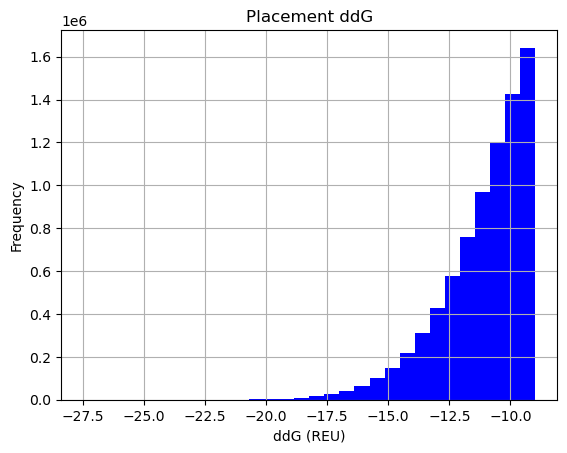

In [10]:
#ddg
x = df['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [11]:
#make new dataframe with ddg above certain thresholds
df_17 = df[df['ddg'] < -17]

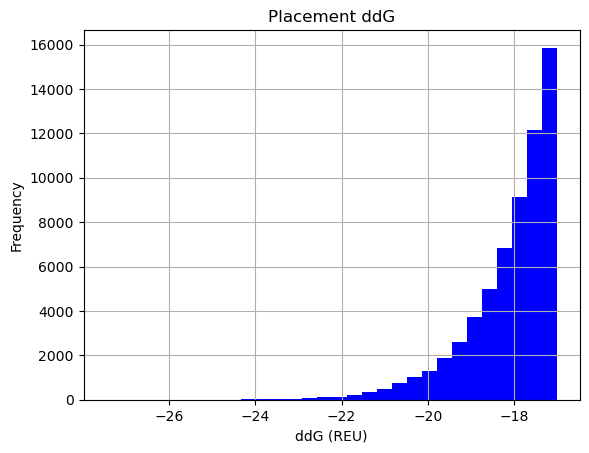

In [12]:
#ddg
x = df_17['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [13]:
#make new dataframe that selects for real motif ratio to be at least 0.25
df_17_real_quarter = df_17[df_17['real_motif_ratio'] >= 0.25]

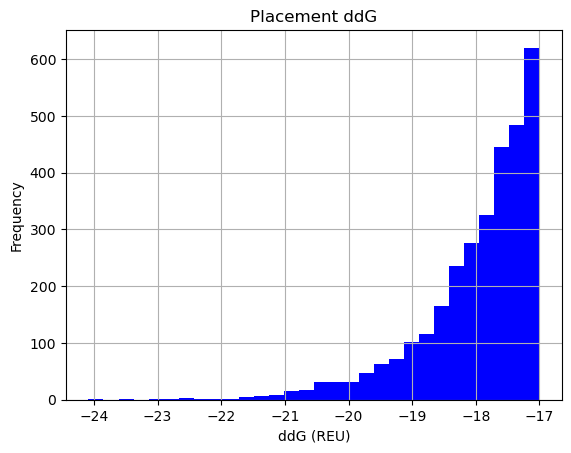

In [14]:
#ddg
x = df_17_real_quarter['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [16]:
len(df_17_real_quarter)

3110

In [17]:
#make new dataframe that selects for having at least 1 rosetta hbond
df_17_real_quarter_rosetta_hbond = df_17_real_quarter[df_17_real_quarter['hbond_motif_count'] >= 2]

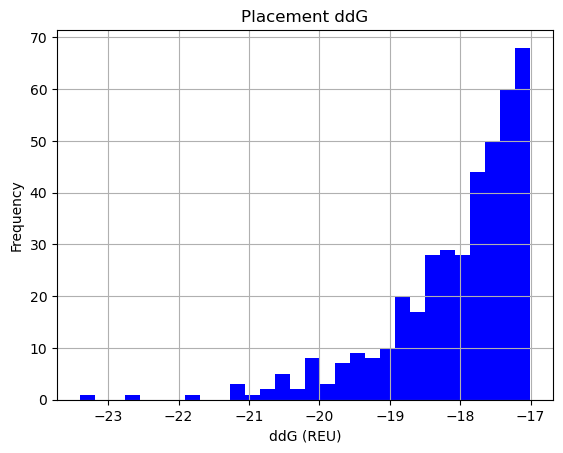

In [18]:
#ddg
x = df_17_real_quarter_rosetta_hbond['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [19]:
len(df_17_real_quarter_rosetta_hbond)

405

In [20]:
df_17_real_quarter_rosetta_hbond = df_17_real_quarter_rosetta_hbond.sort_values(by='ddg')

In [21]:
df_17_real_quarter_rosetta_hbond.to_csv('/scratch/abgvg9/discovery_results/top_1000_placement/12M_-17_real_hbond.csv', index=False)

In [22]:
df_17_real_quarter_rosetta_hbond

file  \
5239947      6521/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/6521/placements/7l1u_receptor_only_PV-006649281448_5_1.pdb   
4803803     5961/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5961/placements/7l1u_receptor_only_PV-006642575375_11_0.pdb   
1289517    11651/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11651/placements/7l1u_receptor_only_PV-000407144265_2_0.pdb   
6240273      7806/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/7806/placements/7l1u_receptor_only_PV-001894047689_1_0.pdb   
3033618      3721/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3721/placements/7l1u_receptor_only_PV-006615739888_9_1.pdb   
6130484      7661/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/7661/placements/7l1u_receptor_only_PV-006662908479_4_1.pdb   
4810171     5970/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5970/placements/7l1u_receptor_only_PV-006642674779_12_0.pdb   
3312838      4079/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4079/placements/7l1u_receptor_only_PV-006620012151_7_3.pdb   
7825695      9826/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/9826/placements/7l1u_receptor_only_PV-006688858672_1_0.pdb   
2950647     3613/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3613/placements/7l1u_receptor_only_PV-006614444158_13_0.pdb   
220417     10279/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10279/placements/7l1u_receptor_only_PV-006694327860_2_0.pdb   
249660     10314/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10314/placements/7l1u_receptor_only_PV-006694747026_4_0.pdb   
6565611     8222/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/8222/placements/7l1u_receptor_only_PV-006669629110_13_6.pdb   
1019282    11302/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11302/placements/7l1u_receptor_only_PV-006706777156_1_3.pdb   
2060387     2235/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/2235/placements/7l1u_receptor_only_PV-005239022292_12_0.pdb   
3223007      3966/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3966/placements/7l1u_receptor_only_PV-006618639665_2_0.pdb   
3573386      4411/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/4411/placements/7l1u_receptor_only_PV-006623981273_1_0.pdb   
1074492   11375/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11375/placements/7l1u_receptor_only_PV-006707650533_10_4.pdb   
2603120      3177/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/3177/placements/7l1u_receptor_only_PV-006609257537_7_1.pdb   
1061970    11358/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/11358/placements/7l1u_receptor_only_PV-006707453830_1_1.pdb   
1945767      1990/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/1990/placements/7l1u_receptor_only_PV-004507097792_8_1.pdb   
658740    10836/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/10836/placements/7l1u_receptor_only_PV-006701191685_12_5.pdb   
4327543     5349/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5349/placements/7l1u_receptor_only_PV-006635245217_13_1.pdb   
4218619      5207/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5207/placements/7l1u_receptor_only_PV-006633535034_9_0.pdb   
4152482      5121/placements/raw_scores.csv:/scratch/abgvg9/discovery_results/top_1000_placement/5121/placements/7l1u_receptor_only_PV-006632485044_1_2.pdb   
2060693     2235/

In [32]:
#make new dataframe with ddg above certain thresholds
df_16 = df[df['ddg'] < -16]

In [33]:
#make new dataframe that selects for real motif ratio to be at least 0.25
df_16_real_quarter = df_16[df_16['real_motif_ratio'] >= 0.25]

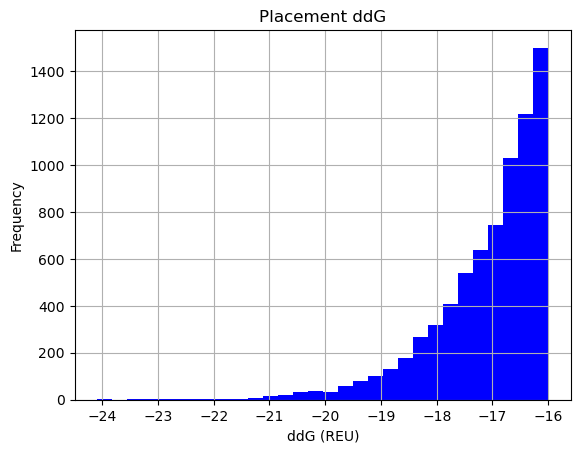

In [34]:
#ddg
x = df_16_real_quarter['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [35]:
len(df_16_real_quarter)

7382

In [36]:
df_16_real_quarter.to_csv('/scratch/abgvg9/discovery_results/top_1000_placement/12M_-16_ddg_quarter_real.csv', index=False)

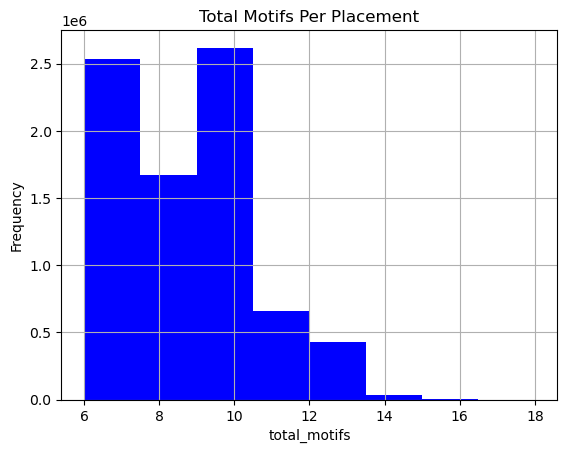

In [23]:
#total motifs
x = df['total_motifs']
#set labels and title
plt.xlabel('total_motifs')
plt.ylabel('Frequency')
plt.title('Total Motifs Per Placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=8, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

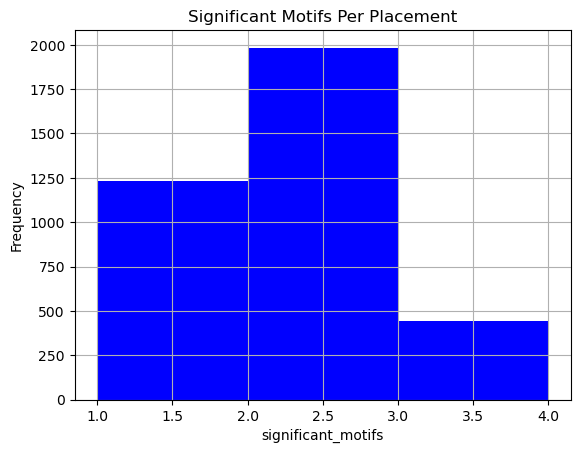

In [8]:
#significant motifs
x = df['significant_motifs']
#set labels and title
plt.xlabel('significant_motifs')
plt.ylabel('Frequency')
plt.title('Significant Motifs Per Placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=3, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

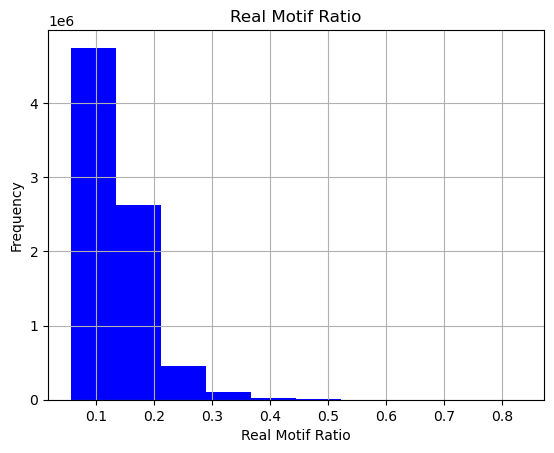

In [17]:
#real motifs ratio
x = df['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=10, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [18]:
df_real_half = df[df['real_motif_ratio'] >= 0.5]

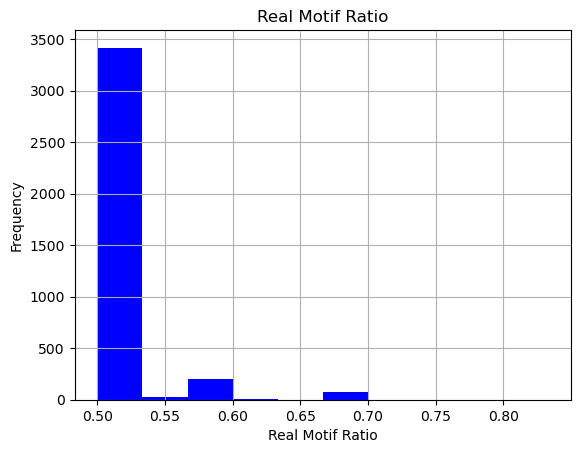

In [19]:
#real motifs ratio
x = df_real_half['real_motif_ratio']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=10, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [20]:
len(df_real_half)

3726

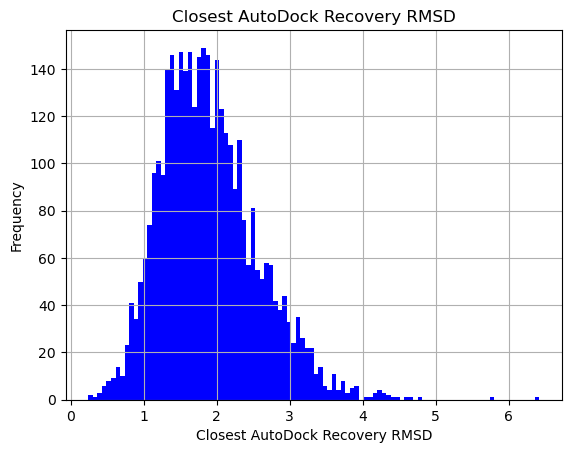

In [10]:
#closest_autodock_recovery_rmsd
#note, if autodock failed to get any placements for the ligand, the default is to set the value to 100
x = df['closest_autodock_recovery_rmsd']
#set labels and title
plt.xlabel('Closest AutoDock Recovery RMSD')
plt.ylabel('Frequency')
plt.title('Closest AutoDock Recovery RMSD')
#create 30 bin 1D hsitogram
plt.hist(x, bins=100, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

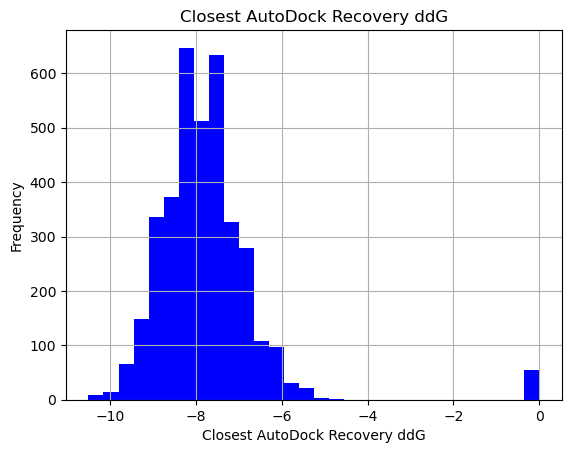

In [11]:
#closest_autodock_recovery_ddg
#note, if autodock failed to get any placements for the ligand, the default is to set the value to 0
x = df['closest_autodock_recovery_ddg']
#set labels and title
plt.xlabel('Closest AutoDock Recovery ddG')
plt.ylabel('Frequency')
plt.title('Closest AutoDock Recovery ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

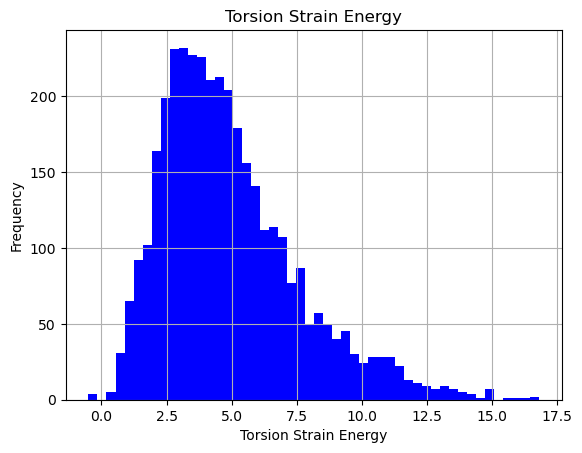

In [23]:
#torsion strain energy
#note, if STRAIN failed to get an energy for the ligand, the default is to set the value to 100
x = df['strain_energy']
#set labels and title
plt.xlabel('Torsion Strain Energy')
plt.ylabel('Frequency')
plt.title('Torsion Strain Energy')
#create 30 bin 1D hsitogram
plt.hist(x, bins=50, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

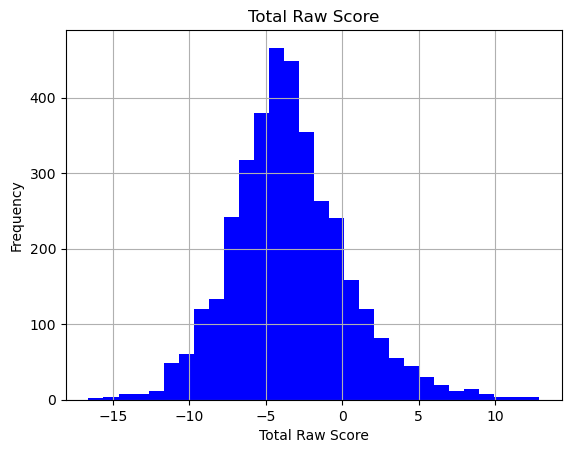

In [13]:
#total score
#raw total score can be very skewed, and likely not a good metric at all
x = df['total']
#set labels and title
plt.xlabel('Total Raw Score')
plt.ylabel('Frequency')
plt.title('Total Raw Score')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

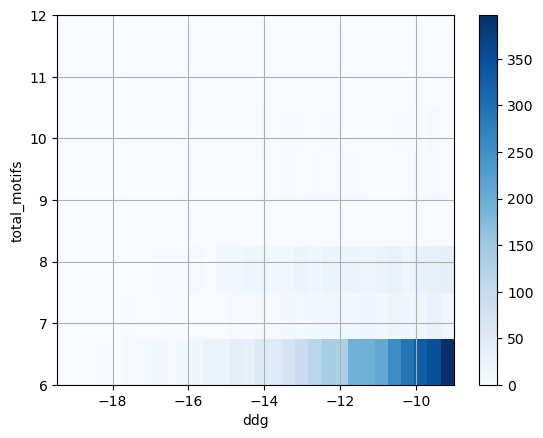

In [27]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['ddg']
y = df['total_motifs']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 8))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg')
plt.ylabel('total_motifs')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

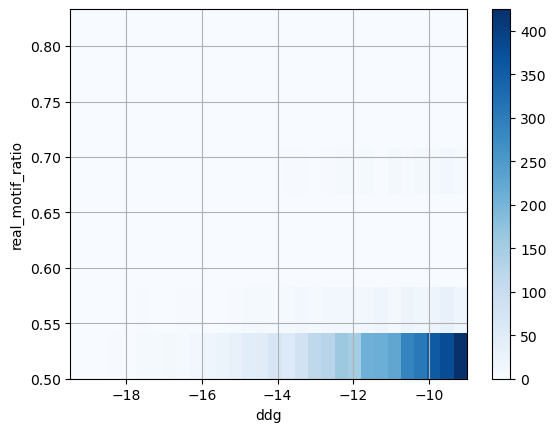

In [28]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['ddg']
y = df['real_motif_ratio']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 8))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg')
plt.ylabel('real_motif_ratio')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

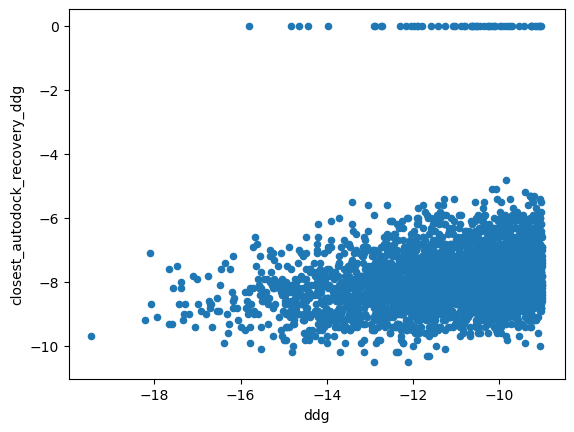

In [16]:
df.plot(kind='scatter',x='ddg',y='closest_autodock_recovery_ddg')
plt.show()

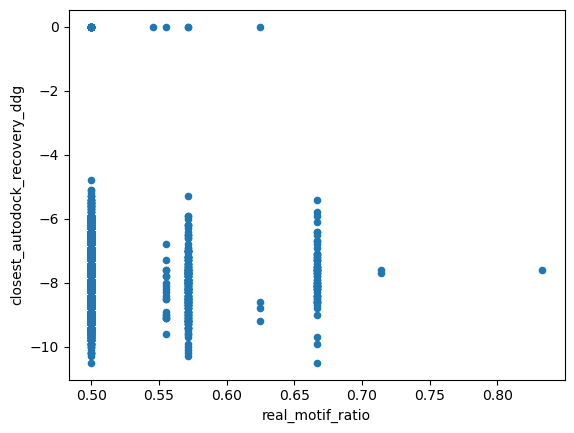

In [17]:
df.plot(kind='scatter',x='real_motif_ratio',y='closest_autodock_recovery_ddg')
plt.show()

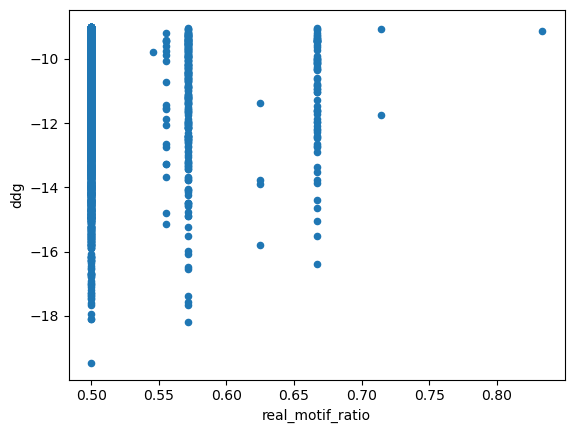

In [18]:
df.plot(kind='scatter',x='real_motif_ratio',y='ddg')
plt.show()

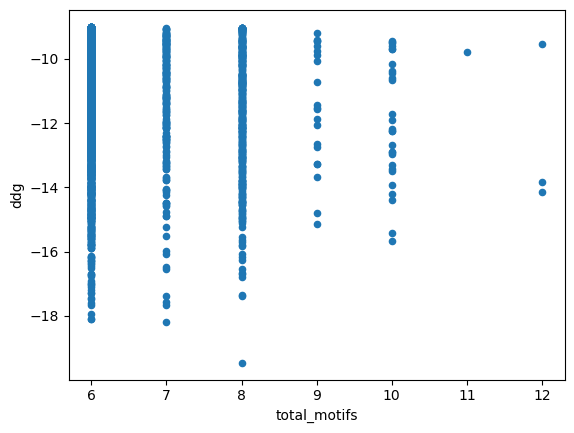

In [19]:
df.plot(kind='scatter',x='total_motifs',y='ddg')
plt.show()

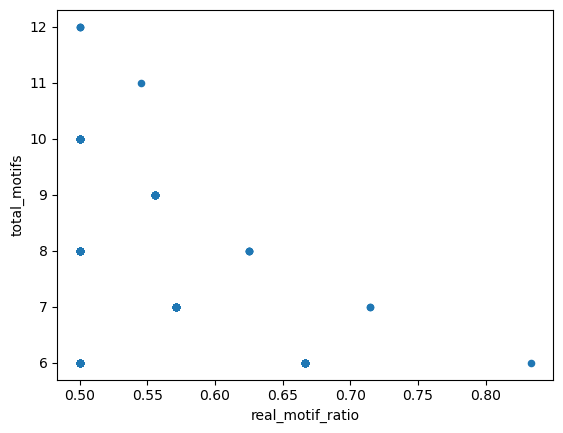

In [20]:
df.plot(kind='scatter',x='real_motif_ratio',y='total_motifs')
plt.show()

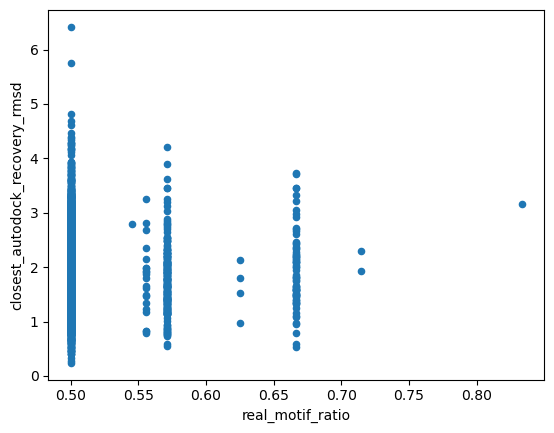

In [24]:
df.plot(kind='scatter',x='real_motif_ratio',y='closest_autodock_recovery_rmsd')
plt.show()

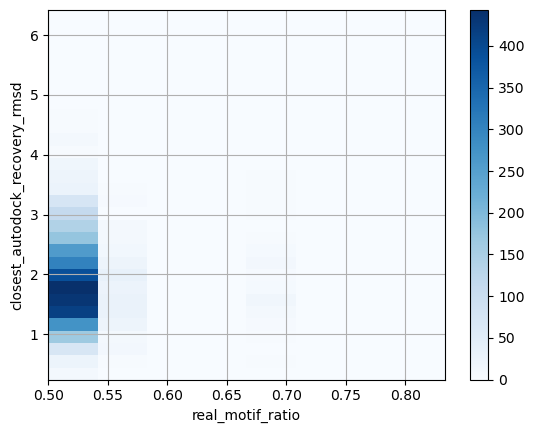

In [26]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df['real_motif_ratio']
y = df['closest_autodock_recovery_rmsd']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(8, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('real_motif_ratio')
plt.ylabel('closest_autodock_recovery_rmsd')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

In [21]:
#df_sorted = df.sort_values(by='real_motif_ratio', ascending=False)
df_sorted = df.sort_values(by='closest_autodock_recovery_ddg', ascending=False)

#print(df_sorted.head(100)[['file','real_motif_ratio','total','closest_autodock_recovery_ddg']])
print(df_sorted)

                                                                                                                    file  \
3211     /scratch/abgvg9/discovery_results/top_1000_placement/8752/placements/7l1u_receptor_only_PV-006675981037_3_3.pdb   
2338     /scratch/abgvg9/discovery_results/top_1000_placement/6315/placements/7l1u_receptor_only_PV-006646813838_9_1.pdb   
30      /scratch/abgvg9/discovery_results/top_1000_placement/10092/placements/7l1u_receptor_only_PV-006692067786_8_4.pdb   
656     /scratch/abgvg9/discovery_results/top_1000_placement/11955/placements/7l1u_receptor_only_PV-006714597247_7_0.pdb   
1369      /scratch/abgvg9/discovery_results/top_1000_placement/350/placements/7l1u_receptor_only_PV-005578246991_5_1.pdb   
1412     /scratch/abgvg9/discovery_results/top_1000_placement/3621/placements/7l1u_receptor_only_PV-006614551298_9_2.pdb   
1880         /scratch/abgvg9/discovery_results/top_1000_placement/490/placements/7l1u_receptor_only_Z5000964557_10_1.pdb   
3406    

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)